In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max.columns", None)

df = pd.read_csv("/content/drive/MyDrive/train.csv",sep = "," , encoding = "utf-8")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv",sep = "," , encoding = "utf-8")

In [ ]:
df.shape , df_test.shape

((100000, 28), (50000, 27))

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                        object
Name                         object
Age                           int64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.describe(exclude=np.number)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [ ]:
missing_values_df=df.isna().sum()
missing_values_df

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

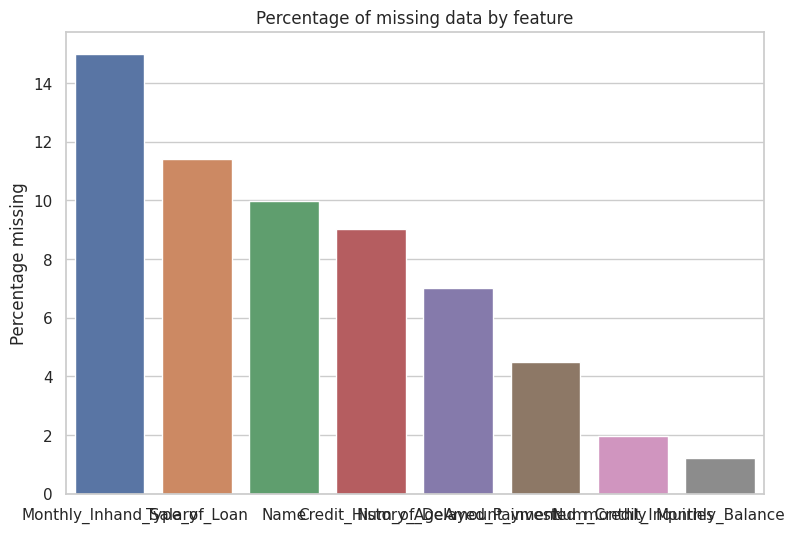

In [ ]:
df_na = (missing_values_df / len(df)) * 100

# drop columns without missing values 
df_na = df_na.drop(df_na[df_na == 0].index)

#sort
df_na=df_na.sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation='horizontal')
sns.barplot(x=df_na.index, y=df_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
object_columns=list(df.select_dtypes(include='object').columns)

In [ ]:
df[object_columns].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.shape

(100000, 28)

In [ ]:
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df['ID'] = df.ID.apply(lambda x: int(x, 16))

In [ ]:
df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16))

In [ ]:
df['Age'] = df.Age.astype(int)   

In [ ]:
df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else float(str(x).replace('-', ''))).astype(float)

In [ ]:
df['Annual_Income'] = df.Annual_Income.astype(float)

In [ ]:
df['Num_of_Loan'] = df.Num_of_Loan.astype(int) 

In [ ]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

In [ ]:
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)

In [ ]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

In [ ]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)

In [ ]:
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)

In [ ]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return num1*12+num2
    else:
        return x

In [ ]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)


In [ ]:
df.shape

(100000, 28)

In [ ]:
object_columns=list(df.select_dtypes(include='object').columns)
df[object_columns].head()

,Month,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [ ]:
num_columns = list(df.select_dtypes(include=["int64","float64"]).columns)
df[num_columns].head()

,ID,Customer_ID,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,23,821000265.0,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,5635,3392,23,821000265.0,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,5636,3392,-500,821000265.0,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,5637,3392,23,821000265.0,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,5638,3392,23,821000265.0,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


Missing Text

In [ ]:
def columns_with_missing_values(DataFrame):
    missing_columns=(DataFrame.isnull().sum())
    return missing_columns[missing_columns > 0]
columns_with_missing_values(df)

Name                        9985
SSN                         5572
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [ ]:
missing_columns=(df.isnull().sum())
(missing_columns[missing_columns > 0]).index

Index(['Name', 'SSN', 'Occupation', 'Monthly_Inhand_Salary', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_History_Age',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)

In [ ]:
df.shape

(100000, 28)

Detect Outliers and Fill NaN Values for Every columns

In [ ]:
miss_num_columns = list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

['SSN',
 'Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [ ]:
def Distribution2(columne,data,i):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

In [ ]:
data=df.copy()

Dropping the variable SSN

In [ ]:
data.drop('SSN',axis=1,inplace=True)

Removing outliers of Monthly_Inhand_Salary

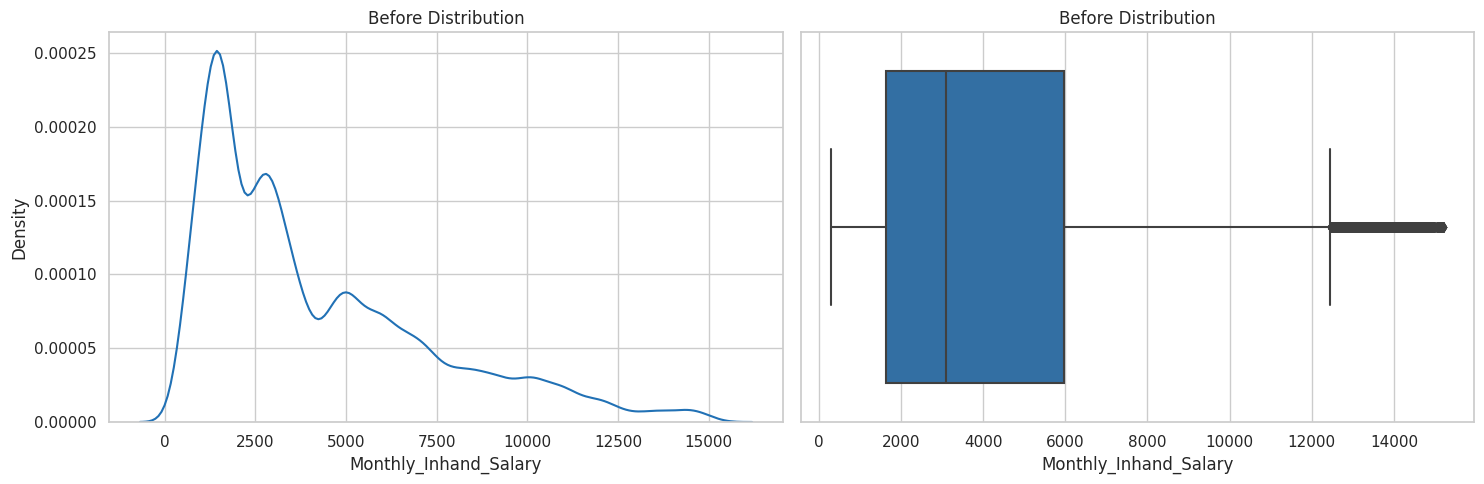

In [ ]:
Distribution2(columne='Monthly_Inhand_Salary',data=data,i=0)

In [ ]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']

In [ ]:
data['Monthly_Inhand_Salary']=data.apply(get_Monthly_Inhand_Salary,axis=1)

In [ ]:
print(data[data['Monthly_Inhand_Salary']>= 13500].shape)
data=data[data.Monthly_Inhand_Salary < 13500]

(1280, 27)


In [ ]:
data.shape

(98720, 27)

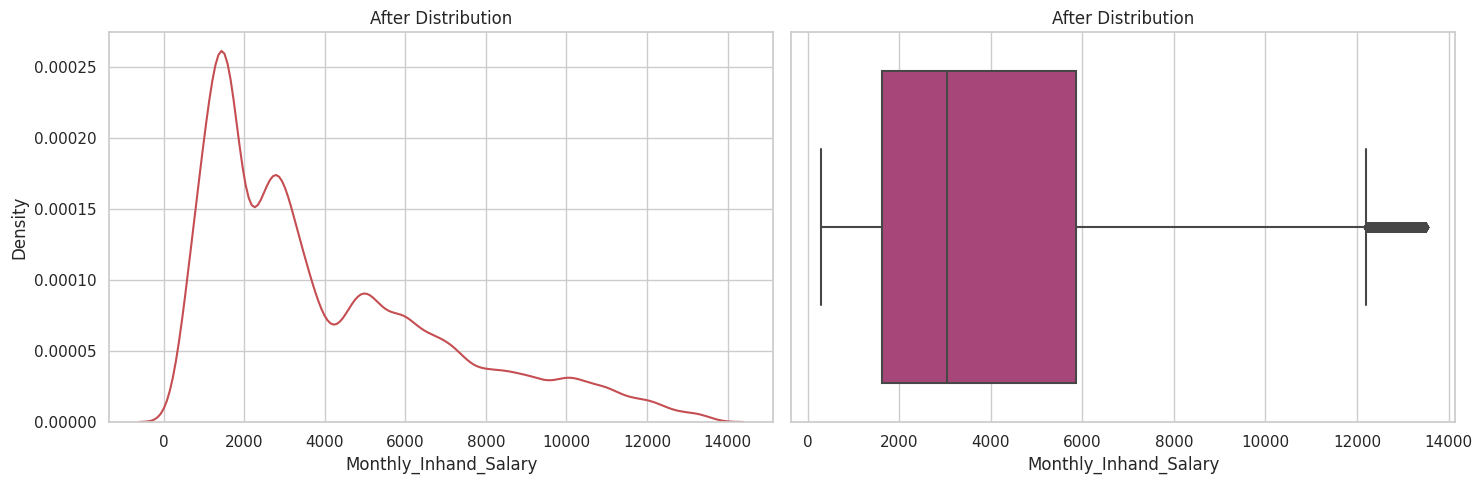

In [ ]:
Distribution2(columne='Monthly_Inhand_Salary',data=data,i=1)

Removing outliers of Num_Of_Delayed_Payment

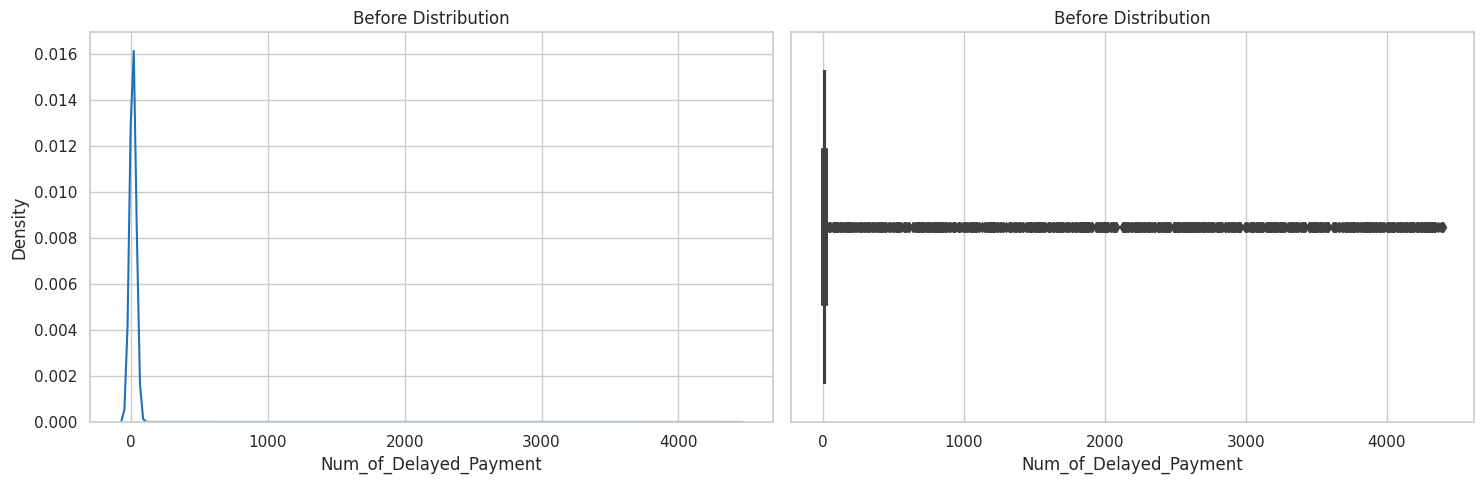

In [ ]:
Distribution2(columne='Num_of_Delayed_Payment',data=data,i=0)

In [ ]:
def get_Num_of_Delayed_Payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        try:
            return Num_of_Delayed_Payment[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']

In [ ]:
data['Num_of_Delayed_Payment']=data.apply(get_Num_of_Delayed_Payment,axis=1)

In [ ]:
print(data[data['Num_of_Delayed_Payment']>=150].shape)
print(data[data['Num_of_Delayed_Payment'] < 0].shape)
data=data[data['Num_of_Delayed_Payment']< 150]
data=data[data['Num_of_Delayed_Payment'] >= 0]

(703, 27)
(624, 27)


In [ ]:
data.shape

(97393, 27)

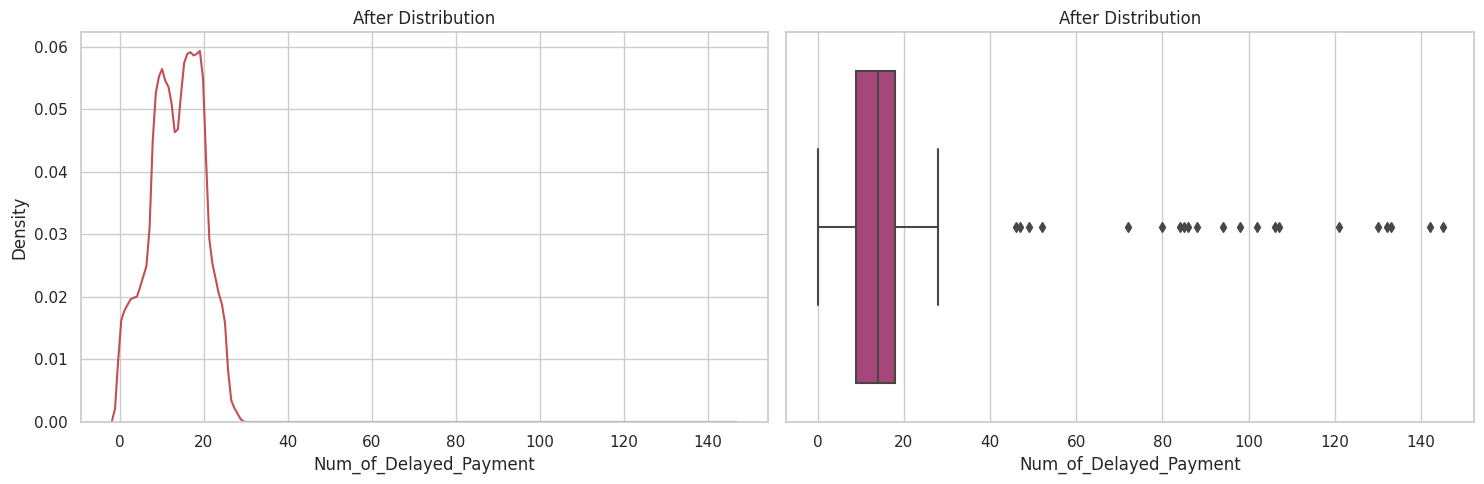

In [ ]:
Distribution2(columne='Num_of_Delayed_Payment',data=data,i=1)

Removing outliers in Changed_Credit_Limit

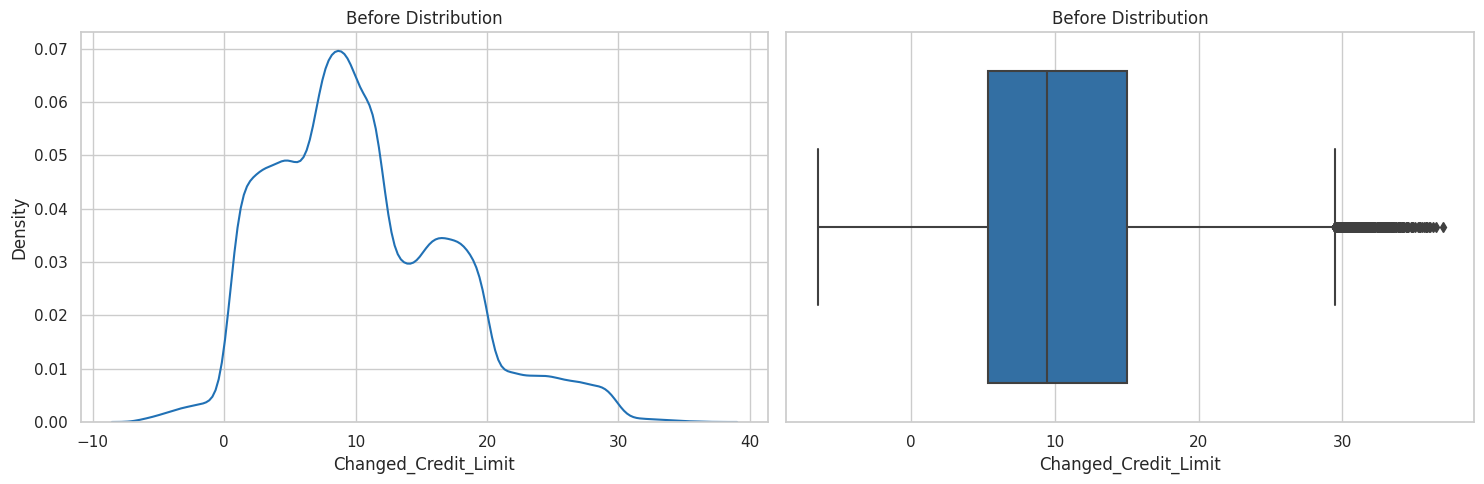

In [ ]:
Distribution2(columne='Changed_Credit_Limit',data=data,i=0)

In [ ]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(data[data['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']

In [ ]:
data['Changed_Credit_Limit']=data.apply(get_Changed_Credit_Limit,axis=1)

In [ ]:
print(data[data['Changed_Credit_Limit']>=30].shape)
data=data[data['Changed_Credit_Limit'] < 30]

(254, 27)


In [ ]:
data.shape

(97139, 27)

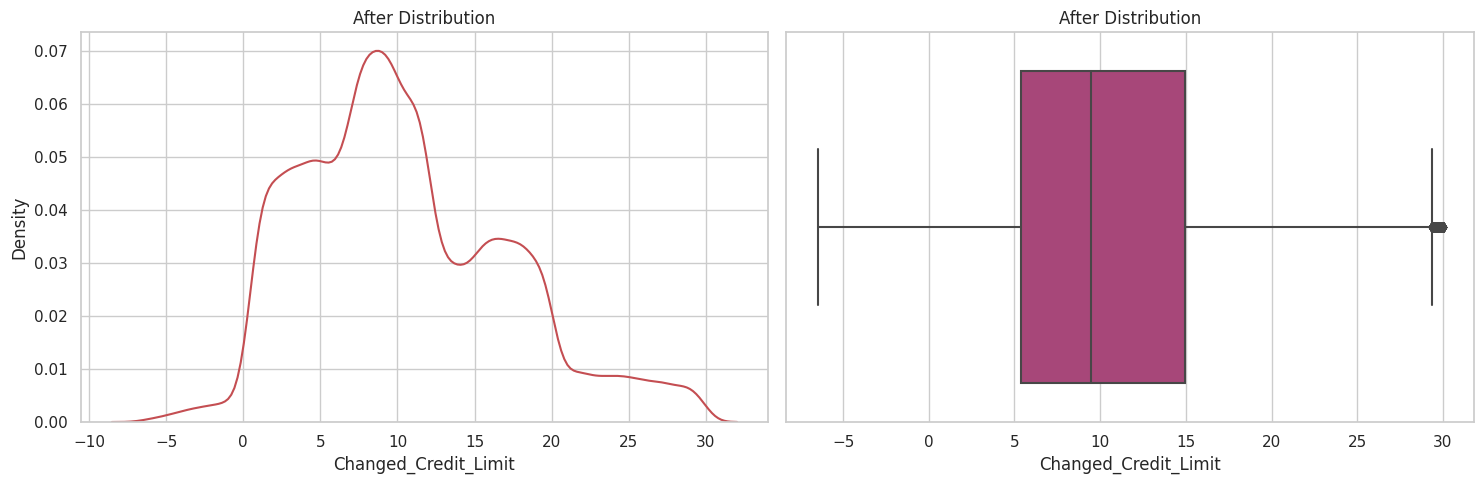

In [ ]:
Distribution2(columne='Changed_Credit_Limit',data=data,i=1)

Outliers in Num_Credit_Inquiries

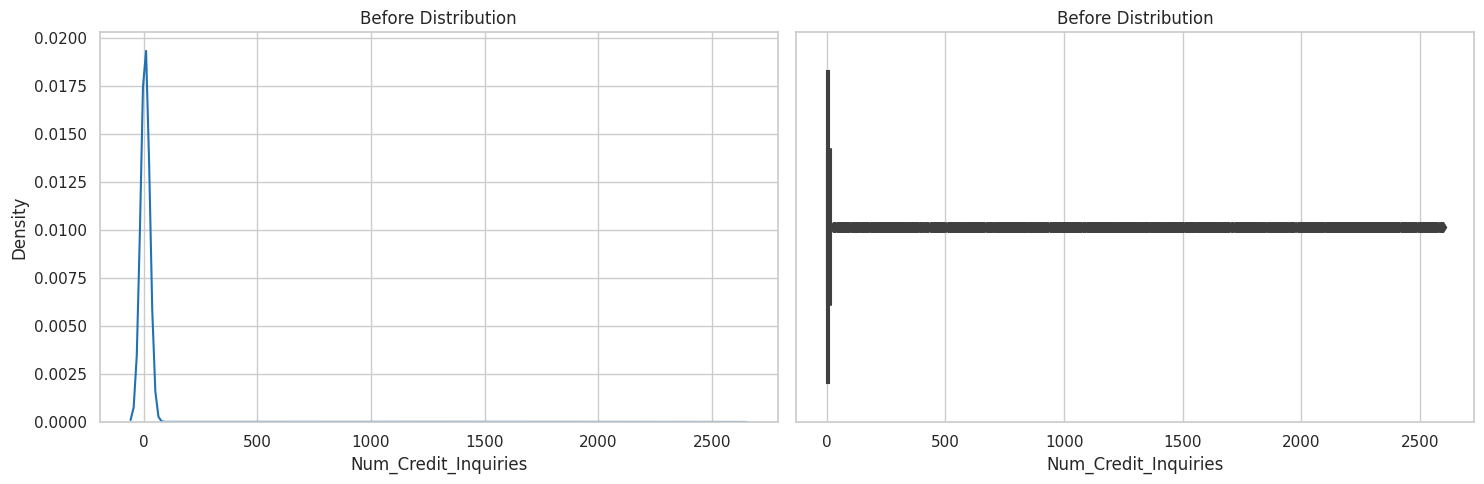

In [ ]:
Distribution2(columne='Num_Credit_Inquiries',data=data,i=0)

In [ ]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']

In [ ]:
data['Num_Credit_Inquiries']=data.apply(get_Num_Credit_Inquiries,axis=1)

In [ ]:
print(data[data['Num_Credit_Inquiries']>=50].shape)
data=data[data['Num_Credit_Inquiries']<50]

(1590, 27)


In [ ]:
data.shape

(95549, 27)

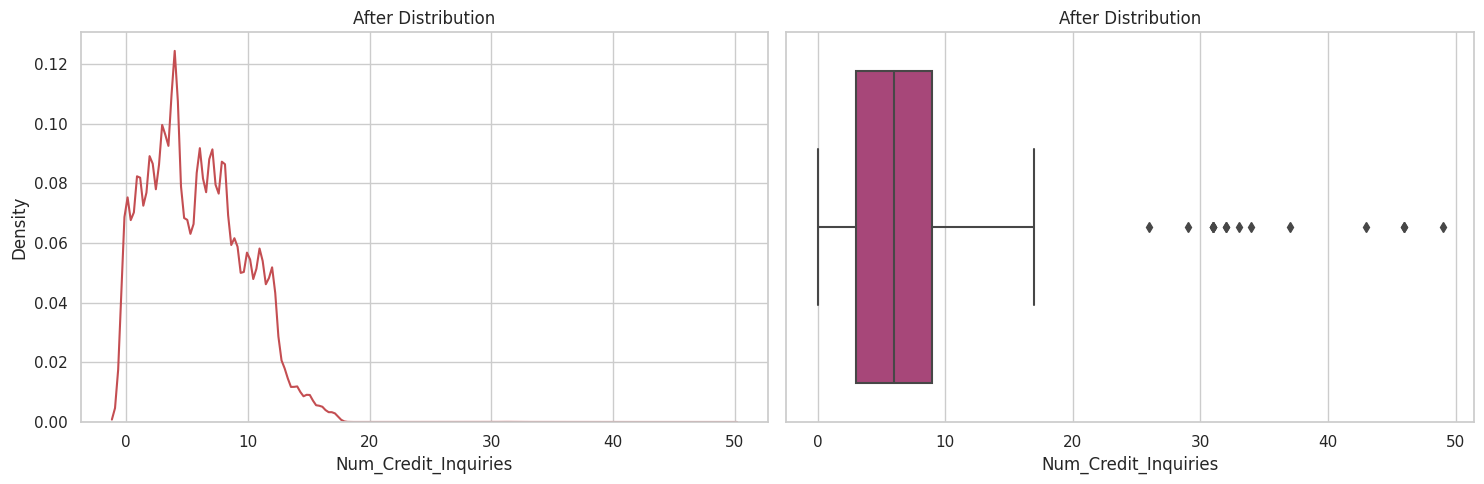

In [ ]:
Distribution2(columne='Num_Credit_Inquiries',data=data,i=1)

Removing outliers in Credit_History_Age

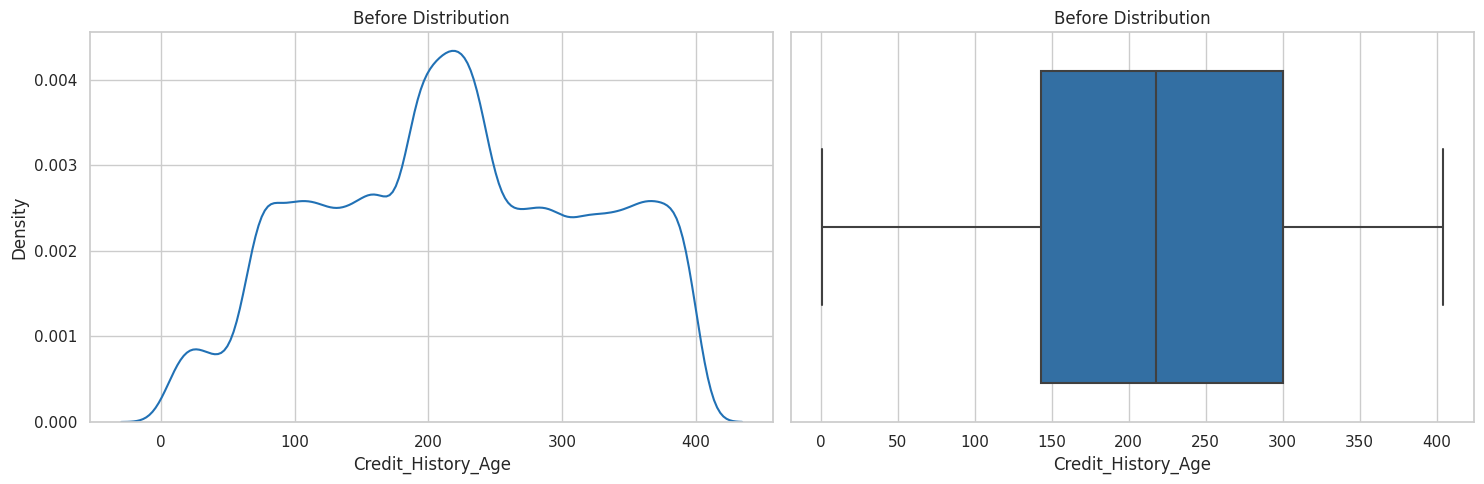

In [ ]:
Distribution2(columne='Credit_History_Age',data=data,i=0)

In [ ]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(data[data['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [ ]:
data['Credit_History_Age']=data.apply(get_Credit_History_Age,axis=1)

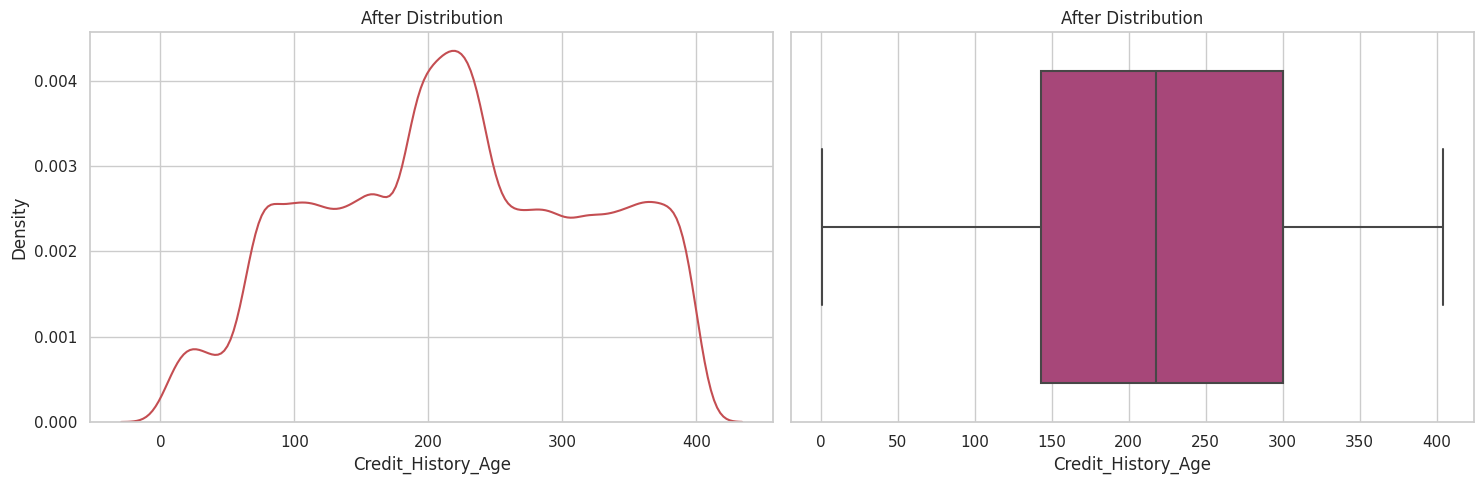

In [ ]:
Distribution2(columne='Credit_History_Age',data=data,i=1)

Removing outliers in Amount_invested_monthly

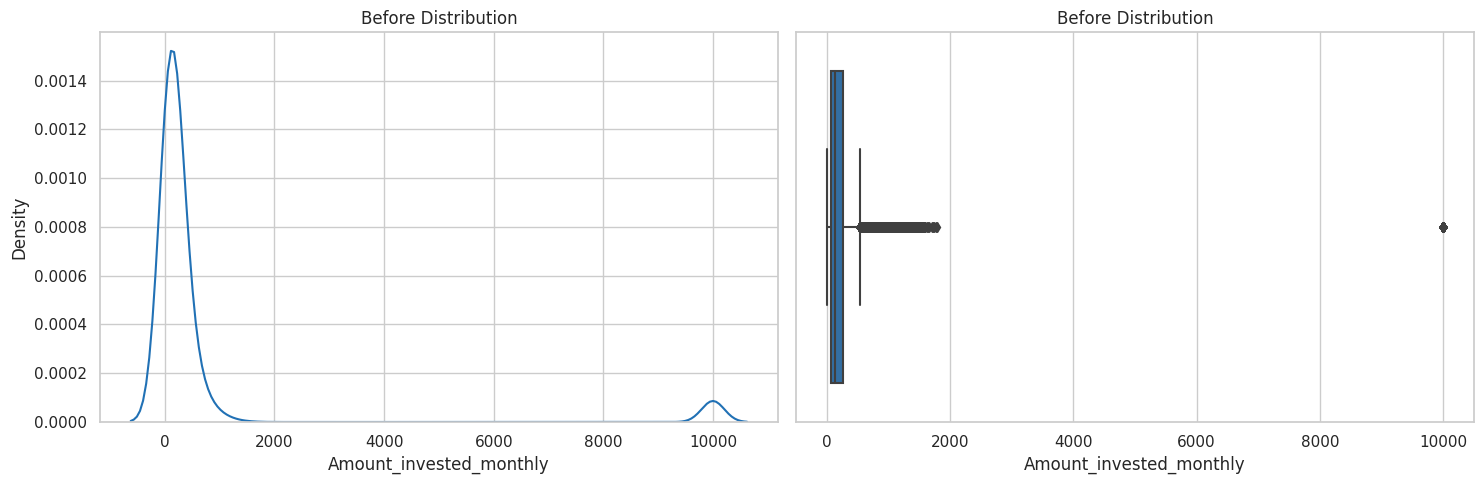

In [ ]:
Distribution2(columne='Amount_invested_monthly',data=data,i=0)

In [ ]:
def get_Amount_invested_monthly(row):
    if pd.isnull(row['Amount_invested_monthly']):
        Amount_invested_monthly=(data[data['Customer_ID']==row['Customer_ID']]['Amount_invested_monthly'].dropna()).mode()
        try:
            return Amount_invested_monthly[0]
        except:
            return np.NaN
    else:
        return row['Amount_invested_monthly']

In [ ]:
data['Amount_invested_monthly']=data.apply(get_Amount_invested_monthly,axis=1)

In [ ]:
print(data[data['Amount_invested_monthly']>=1000].shape)
data=data[data['Amount_invested_monthly']<1000]

(4907, 27)


In [ ]:
data.shape

(90642, 27)

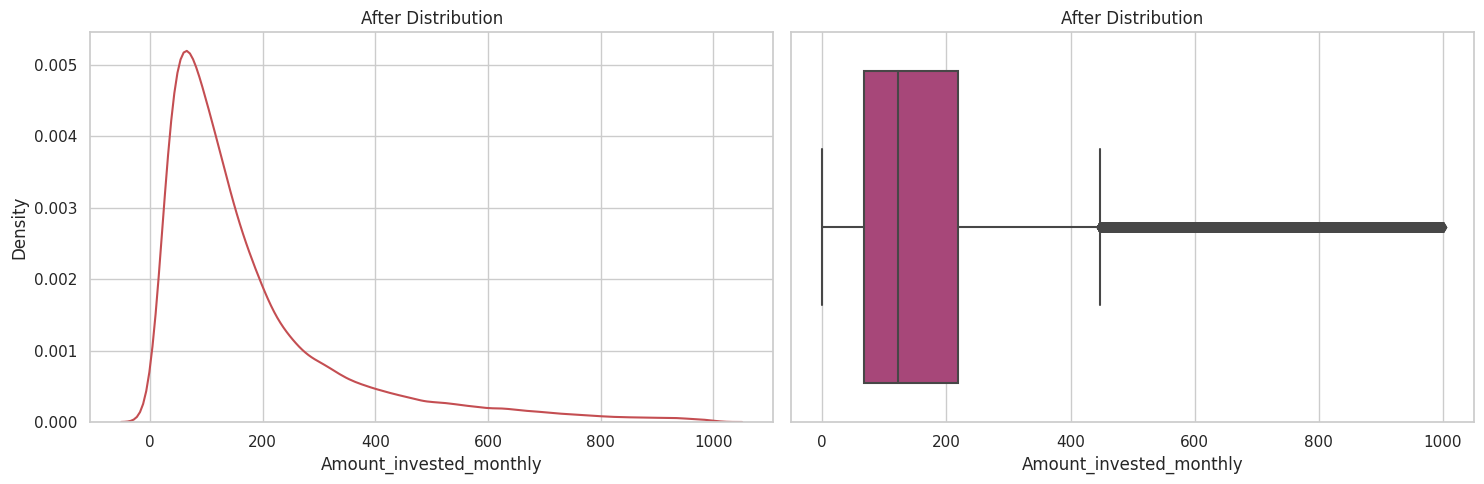

In [ ]:
Distribution2(columne='Amount_invested_monthly',data=data,i=1)

In [ ]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(data[data['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [ ]:
data['Monthly_Balance']=data.apply(get_Monthly_Balance,axis=1)

In [ ]:
print(data[data['Monthly_Balance'] <= 0].shape)
data = data[data['Monthly_Balance'] > 0]

(9, 27)


In [ ]:
data.shape

(90633, 27)

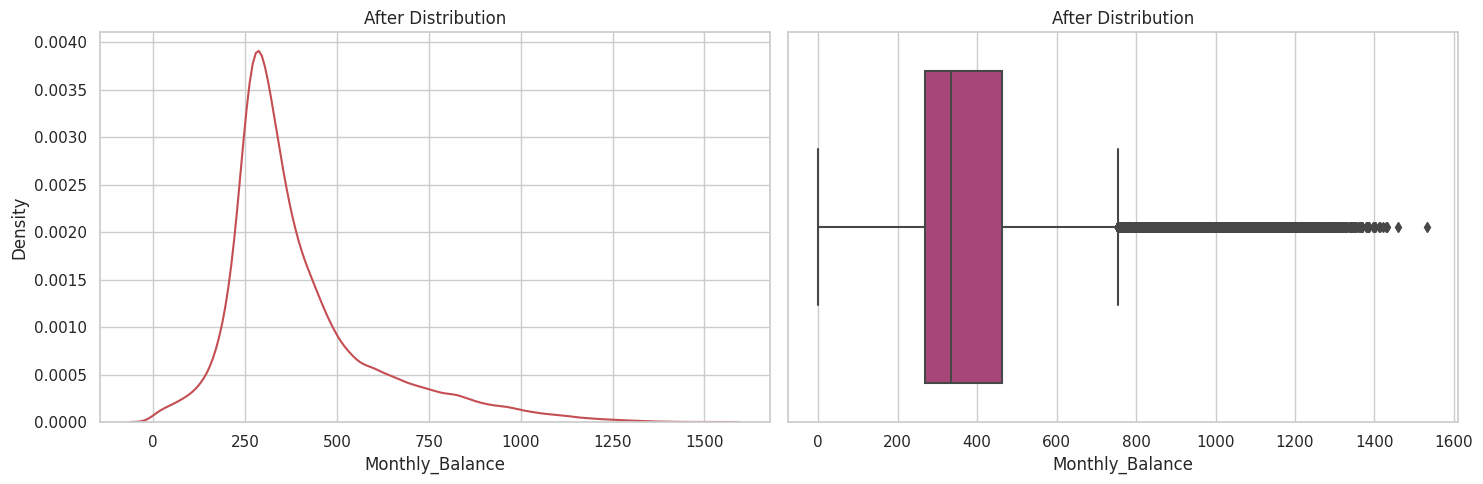

In [ ]:
Distribution2(columne='Monthly_Balance',data=data,i=1)

In [ ]:
missing_columns=data.isnull().sum()
miss_num_columns = list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

[]

In [ ]:
columns_with_missing_values(data)

Name                  9035
Occupation            6395
Type_of_Loan         10220
Credit_Mix           18297
Payment_Behaviour     6894
dtype: int64

In [ ]:
miss_object_columns=list(df[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)
miss_object_columns

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

In [ ]:
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(data[data['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [ ]:
data['Occupation']=data.apply(get_Occupation,axis=1)

In [ ]:
data[data['Occupation'].isnull()]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [ ]:
data['Occupation'] = data['Occupation'].fillna(data['Occupation'].mode()[0])

In [ ]:
len(data[data['Occupation'].isnull()])

0

Type_Of_Loan

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,March,Aaron Maashoh,-500,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('Not Specified')

In [ ]:
def get_Diff_Values_Colum(df_data):
    valu=['Auto Loan','Credit-Builder Loan','Debt Consolidation Loan','Home Equity Loan','Mortgage Loan','Not Specified',
          'Payday Loan','Personal Loan','Student Loan']
    for x in valu:
        df_data[x] = np.NAN
        
    index=0
    for i in df_data['Type_of_Loan']:
        diff_value=[]
        if  ',' not in i:
            diff_value.append(i.strip())
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
        
        for x in valu:
            if x in diff_value:
                df_data[x].iloc[index]=1
        index=index+1
        
    for x in valu:
        df_data[x] = df_data[x].fillna(0)
        df_data[x] = df_data[x].astype(int) 
    return df_data

data=get_Diff_Values_Colum(data)

In [ ]:
data.drop('Type_of_Loan',axis=1,inplace=True)

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,-500,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0
3,5637,3392,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,1,0,1,0,0,0,1,0
4,5638,3392,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,1,0,1,0,0,0,1,0


Credit_Mix

In [ ]:
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(data[data['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [ ]:
data['Credit_Mix']=data.apply(get_Credit_Mix,axis=1)

In [ ]:
len(data[data['Credit_Mix'].isnull()])

0

Payment_Behaviour

In [ ]:
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(data[data['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']

In [ ]:
data['Payment_Behaviour']=data.apply(get_Payment_Behaviour,axis=1)

In [ ]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].fillna(data['Payment_Behaviour'].mode()[0])

In [ ]:
len(data[data['Payment_Behaviour'].isnull()])

0

In [ ]:
columns_with_missing_values(data)

Name    9035
dtype: int64

In [ ]:
num_columns = list(data.select_dtypes(include=["int64","float64",'int32']).columns)
num_columns=num_columns[2:-9]

In [ ]:
process=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

In [ ]:
for i in num_columns:
    if i not in process:
        print(i)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month


Age

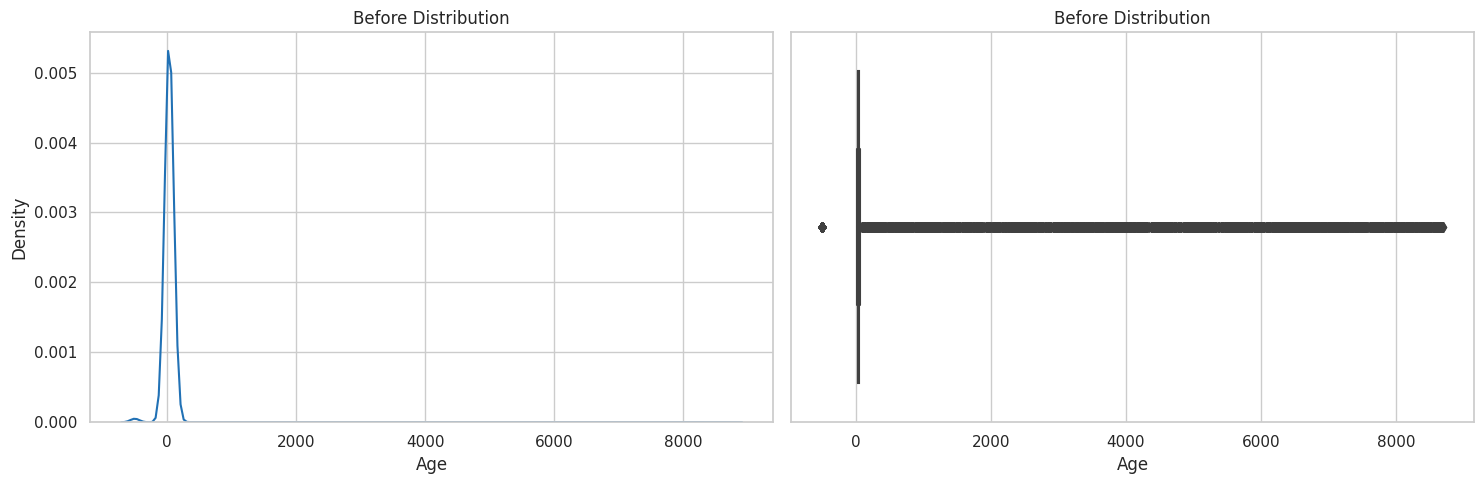

In [ ]:
Distribution2(columne='Age',data=data,i=0)

In [ ]:
print(data[data['Age'] > 60].shape)

(1714, 35)


In [ ]:
def get_age(row):
    if (60 < row['Age']) or (0 > row['Age']) :
        Age=(data[data['Customer_ID']==row['Customer_ID']]['Age'].dropna()).mode()
        try:
            return Age[0]
        except:
            return np.NaN
    else:
        return row['Age']

In [ ]:
data['Age']=data.apply(get_age,axis=1)

In [ ]:
data[data['Age'] > 60].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [ ]:
data.drop(data[data['Age'] > 60].index,axis=0,inplace=True)

In [ ]:
data[data['Age'] < 0].sort_values('Age')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
45664,74130,28583,January,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,40.884276,280.0,No,130.619711,325.109918,High_spent_Medium_value_payments,629.031372,Good,0,0,0,1,1,0,1,0,0
45665,74131,28583,February,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,5,9.0,0.72,1.0,Good,904.93,28.185199,281.0,No,130.619711,308.567185,High_spent_Medium_value_payments,645.574105,Good,0,0,0,1,1,0,1,0,0
45669,74135,28583,June,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,8,9.0,0.72,1.0,Good,904.93,34.870185,285.0,No,130.619711,426.690980,Low_spent_Medium_value_payments,557.450309,Standard,0,0,0,1,1,0,1,0,0
45671,74137,28583,August,Groomp,-500,Developer,99403.32,8347.61,0,3,11,3,9,9.0,0.72,1.0,Good,904.93,39.074470,287.0,No,130.619711,118.730491,High_spent_Medium_value_payments,835.410798,Standard,0,0,0,1,1,0,1,0,0


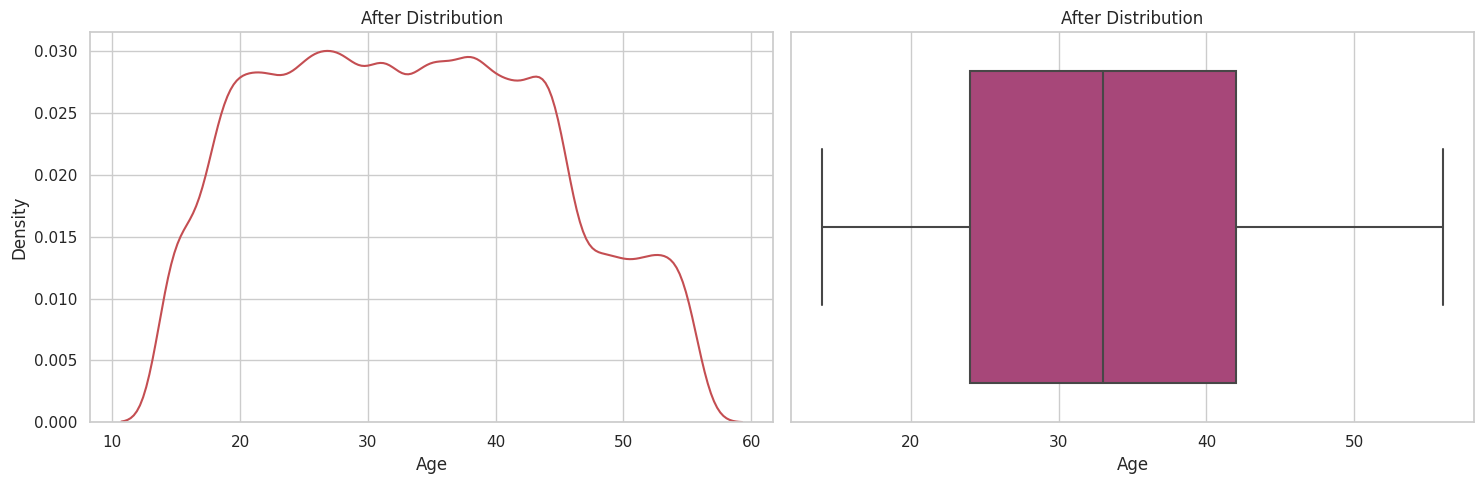

In [ ]:
data.drop(data[data['Age']  < 0].index,axis=0,inplace=True)
Distribution2(columne='Age',data=data,i=1)

Annual Income

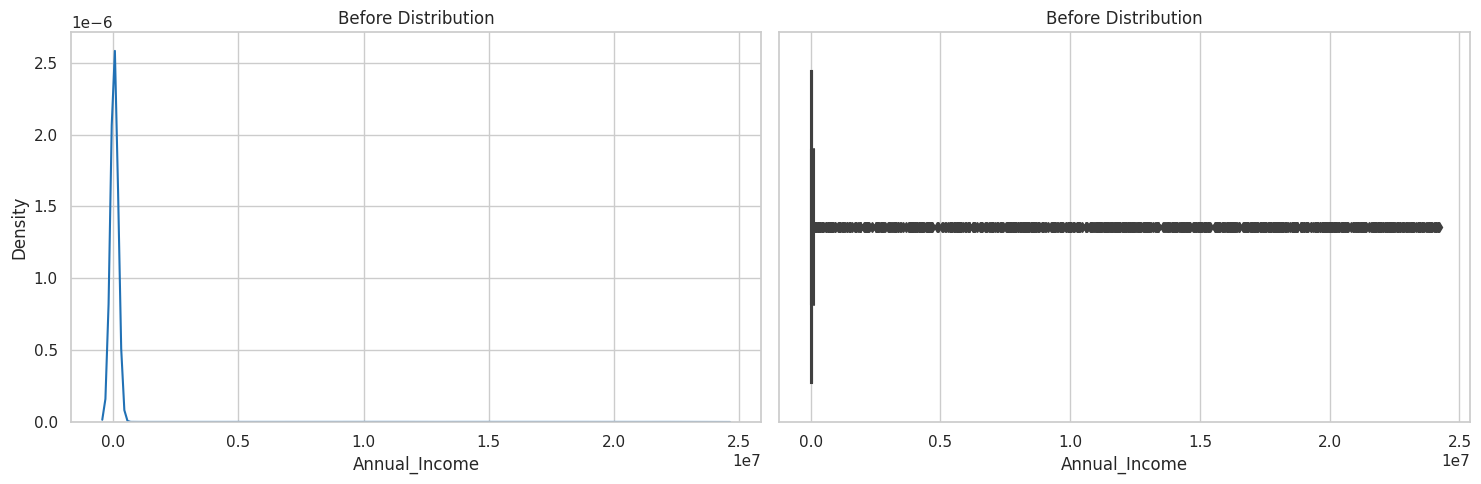

In [ ]:
Distribution2(columne='Annual_Income',data=data,i=0)

In [ ]:
def get_Annual_Income(row):
    if 150000 < row['Annual_Income'] :
        Annual_Income=(data[data['Customer_ID']==row['Customer_ID']]['Annual_Income'].dropna()).mode()
        try:
            return Annual_Income[0]
        except:
            return np.NaN
    else:
        return row['Annual_Income']

In [ ]:
data['Annual_Income']=data.apply(get_Annual_Income,axis=1)

In [ ]:
data[data['Annual_Income'] > 165000].sort_values('Annual_Income')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
56581,90503,15769,June,NaN,46,Accountant,167258.04,12986.315524,5,2,12,0,13,1.0,10.72,2.0,Good,476.64,29.757926,324.0,No,1213.854476,608.969535,Low_spent_Large_value_payments,1081.047465,Good,0,0,0,0,0,1,0,0,0
56582,90504,15769,July,Lionel Laurentb,46,Accountant,167258.04,12986.315524,566,2,12,0,13,1.0,10.72,2.0,Good,476.64,45.109866,325.0,No,1213.854476,464.293793,Low_spent_Large_value_payments,1205.723207,Good,0,0,0,0,0,1,0,0,0
56583,90505,15769,August,Lionel Laurentb,46,Accountant,167258.04,12986.315524,5,1123,12,0,13,0.0,10.72,2.0,Good,476.64,26.568010,324.0,No,1213.854476,963.127698,Low_spent_Large_value_payments,726.889302,Good,0,0,0,0,0,1,0,0,0
36013,59651,21693,June,Nick Edwardsv,26,Journalist,167753.52,13102.045569,3,3,12,3,7,7.0,4.62,2.0,Good,1079.59,41.106992,349.0,No,1190.730221,225.515481,High_spent_Large_value_payments,1160.714729,Good,0,0,0,0,1,1,0,1,0
35477,58847,41452,June,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,45.132045,381.0,No,1779.103254,398.840854,Low_spent_Large_value_payments,994.533827,Good,1,0,1,0,0,0,1,0,0
35478,58848,41452,July,Danielr,51,Teacher,171292.56,12574.940065,1,5,9,-100,6,4.0,5.49,4.0,Good,393.01,31.889407,387.0,No,1779.103254,327.980626,High_spent_Medium_value_payments,1045.394055,Standard,1,0,1,0,0,0,1,0,0
35479,58849,41452,August,Danielr,52,Teacher,171292.56,12574.940065,1,5,9,3,3,1.0,5.49,4.0,Good,393.01,40.146312,388.0,No,1779.103254,503.449545,High_spent_Medium_value_payments,869.925136,Good,1,0,1,0,0,0,1,0,0
9378,19700,13909,March,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,10.0,10.76,0.0,Good,685.01,40.275432,369.0,No,1634.213281,668.401726,Low_spent_Large_value_payments,1072.862608,Poor,0,0,0,0,0,1,0,0,0
9379,19701,13909,April,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,8,8.0,10.76,0.0,Good,685.01,44.798586,370.0,No,1634.213281,291.345581,High_spent_Medium_value_payments,1429.918752,Standard,0,0,0,0,0,1,0,0,0
9380,19702,13909,May,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,6,0,7,8.0,16.76,0.0,Good,685.01,33.439295,371.0,No,1634.213281,463.706400,High_spent_Small_value_payments,1267.557933,Standard,0,0,0,0,0,1,0,0,0


In [ ]:
data.drop(data[data['Annual_Income']  > 165000].index,axis=0,inplace=True)

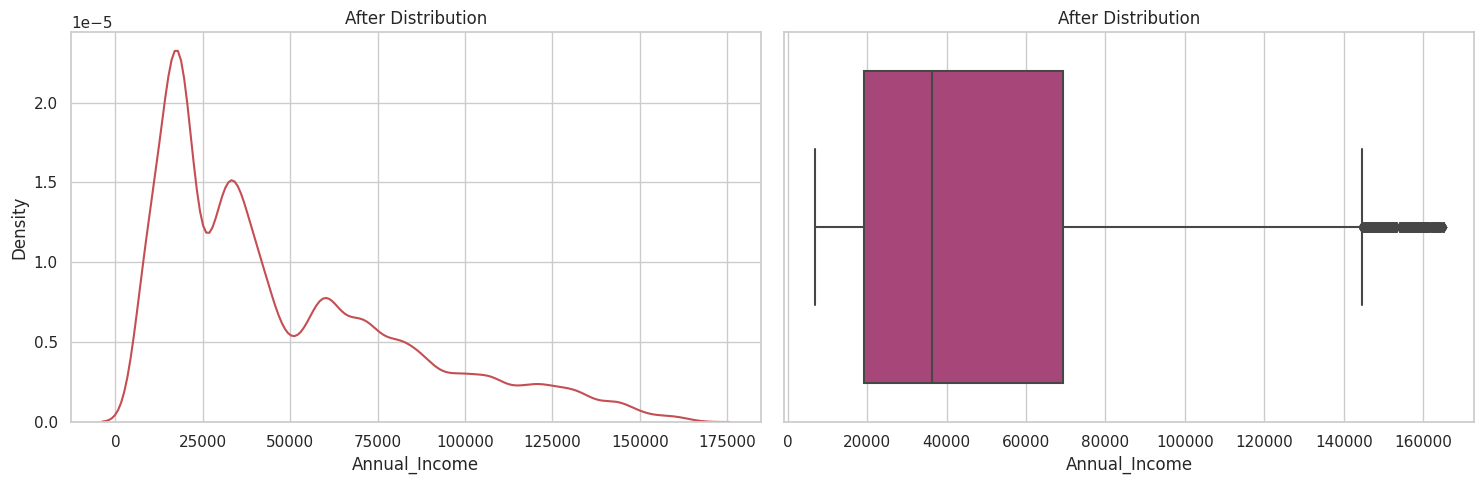

In [ ]:
Distribution2(columne='Annual_Income',data=data,i=1)

Num_Bank_Accounts

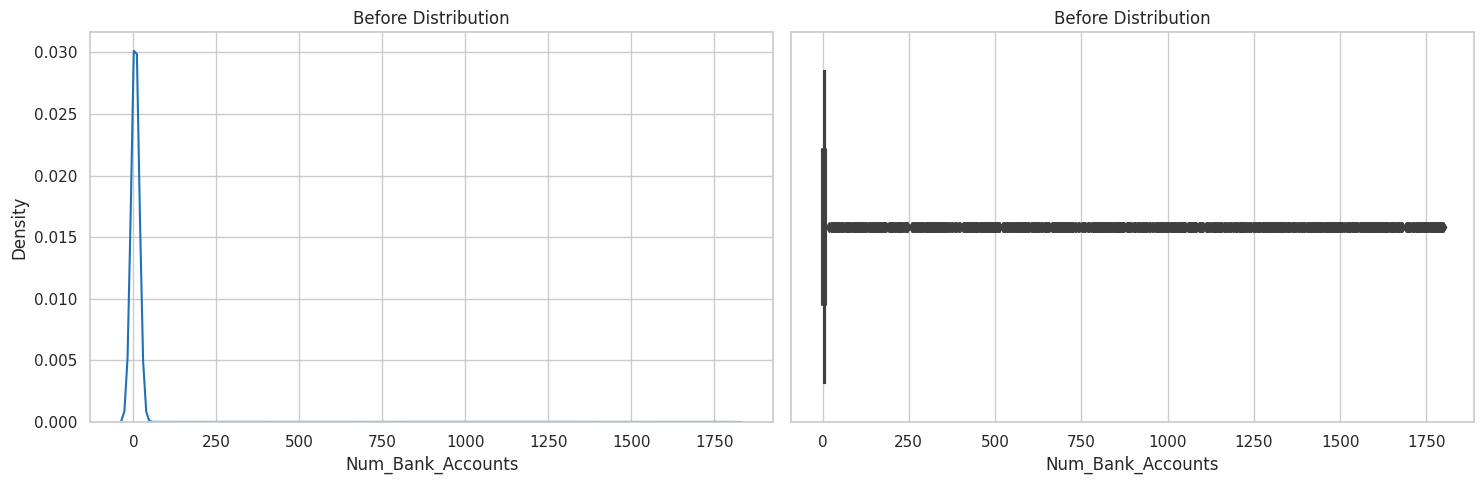

In [ ]:
Distribution2(columne='Num_Bank_Accounts',data=data,i=0)

In [ ]:
def get_Num_Bank_Accounts(row):
    if 12 < row['Num_Bank_Accounts'] :
        Num_Bank_Accounts=(data[data['Customer_ID']==row['Customer_ID']]['Num_Bank_Accounts'].dropna()).mode()
        try:
            return Num_Bank_Accounts[0]
        except:
            return np.NaN
    else:
        return row['Num_Bank_Accounts']
data['Num_Bank_Accounts']=data.apply(get_Num_Bank_Accounts,axis=1)
data[data['Num_Bank_Accounts'] > 12]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


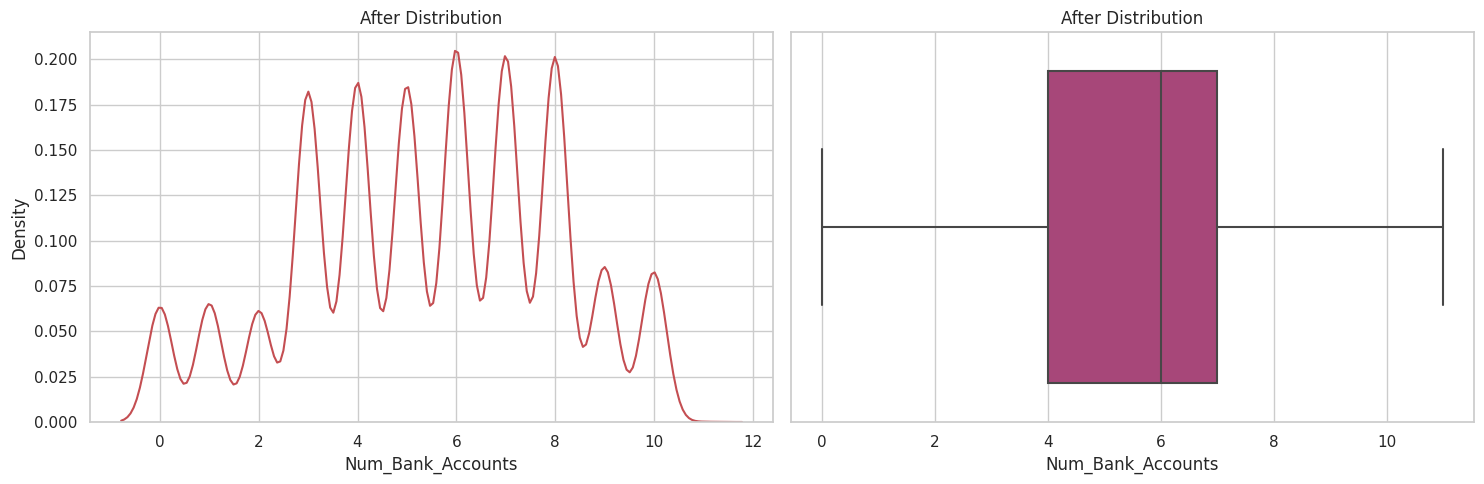

In [ ]:
data.drop(data[data['Num_Bank_Accounts']  > 12].index,axis=0,inplace=True)
data.drop(data[data['Num_Bank_Accounts']  < 0].index,axis=0,inplace=True)
Distribution2(columne='Num_Bank_Accounts',data=data,i=1)

Num_Credit_Card

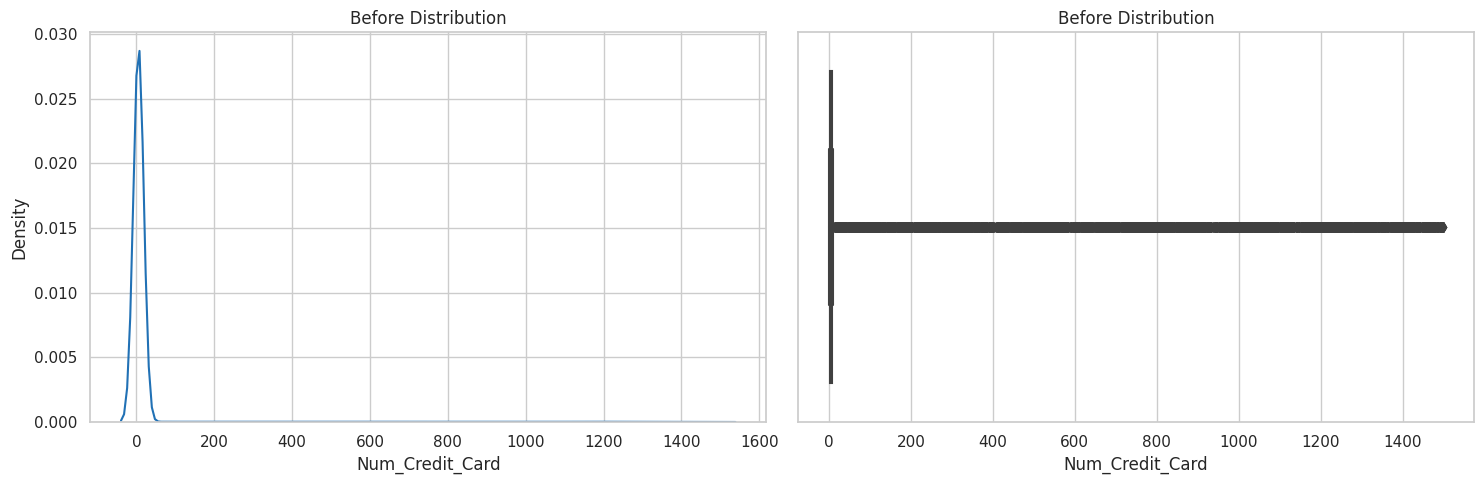

In [ ]:
Distribution2(columne='Num_Credit_Card',data=data,i=0)

In [ ]:
data[data['Num_Credit_Card'] > 14]

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
40,5694,38382,January,Np,31,Lawyer,73928.46,5988.705000,4,1288,8,0,12,10.0,10.14,2.0,Good,548.20,39.962685,384.0,No,15015.000000,98.674410,High_spent_Large_value_payments,740.196090,Good,0,0,0,0,0,1,0,0,0
157,5867,16640,June,Reema,32,Entrepreneur,19300.34,1512.361667,6,1029,17,5,51,17.0,9.95,8.0,Bad,2430.21,25.847791,223.0,Yes,49.572062,83.447449,Low_spent_Large_value_payments,288.216656,Poor,1,0,1,0,1,1,1,0,0
163,5877,4911,April,NaN,41,Musician,19514.88,1828.240000,7,488,17,0,30,12.0,4.17,2.0,Standard,881.40,34.503707,234.0,No,0.000000,45.388820,High_spent_Medium_value_payments,387.435180,Poor,0,0,0,0,0,1,0,0,0
207,5941,19779,August,Reijik,48,Entrepreneur,20787.69,1999.307500,8,1381,14,3,22,14.0,8.13,3.0,Standard,614.60,35.344188,221.0,No,42.221993,21.745531,High_spent_Large_value_payments,375.963226,Standard,0,1,0,1,0,0,0,0,0
215,5953,47455,August,Ashleyk,30,Writer,34290.12,2697.510000,9,898,25,7,52,9.0,13.96,13.0,Standard,2686.81,36.820649,171.0,Yes,185.111983,94.917216,High_spent_Small_value_payments,249.721801,Poor,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99605,155039,23917,June,Martinb,38,Writer,126514.72,10341.893333,8,1255,5,3,21,19.0,10.64,0.0,Standard,470.42,29.696182,355.0,No,61447.000000,902.340388,Low_spent_Small_value_payments,109.816092,Good,1,1,0,1,0,0,0,0,0
99611,155049,10281,April,Alistair Barre,31,Journalist,64901.37,5298.447500,3,514,20,-100,14,15.0,2.94,0.0,Standard,442.06,29.639741,373.0,Yes,0.000000,162.171160,High_spent_Medium_value_payments,617.673590,Standard,0,0,0,0,0,1,0,0,0
99615,155053,10281,August,Alistair Barre,32,Journalist,64901.37,5298.447500,3,232,20,0,19,18.0,2.94,3.0,Standard,442.06,29.145534,377.0,Yes,0.000000,126.263036,High_spent_Large_value_payments,643.581714,Standard,0,0,0,0,0,1,0,0,0
99619,155061,44646,April,Jino,30,Writer,142560.36,11773.030000,6,1430,13,1,23,15.0,11.22,0.0,Standard,220.75,34.671699,210.0,No,76.772094,982.946968,Low_spent_Large_value_payments,387.583938,Standard,0,0,0,0,0,0,0,0,1


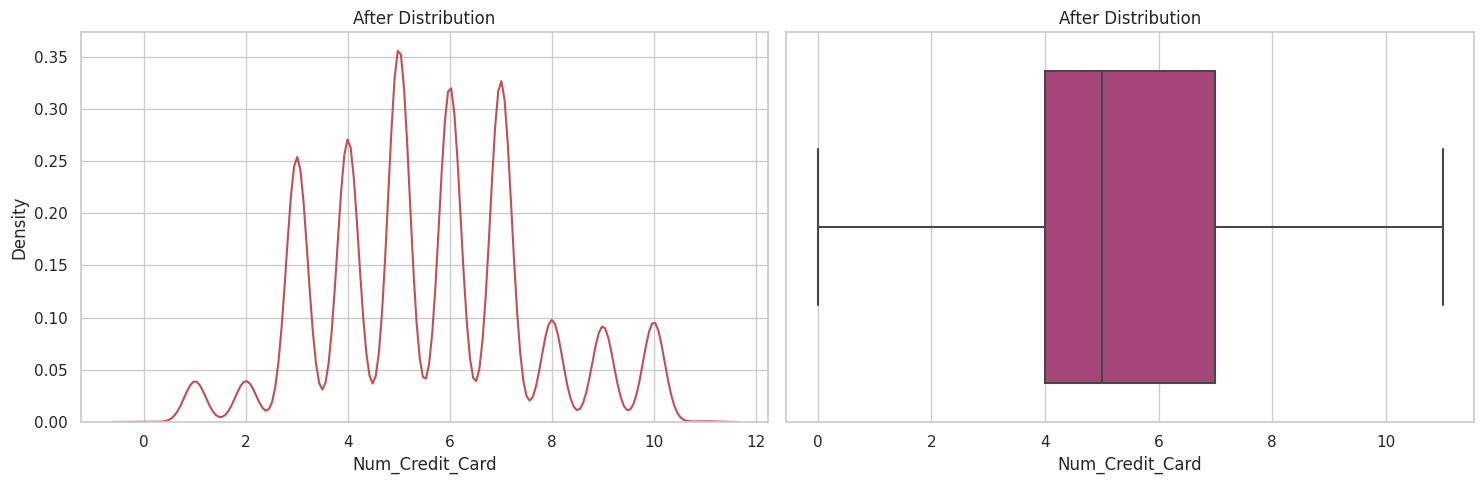

In [ ]:
def get_Num_Credit_Card(row):
    if 14 < row['Num_Credit_Card'] :
        Num_Credit_Card=(data[data['Customer_ID']==row['Customer_ID']]['Num_Credit_Card'].dropna()).mode()
        try:
            return Num_Credit_Card[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Card']
data['Num_Credit_Card']=data.apply(get_Num_Credit_Card,axis=1)
data.drop(data[data['Num_Credit_Card']  > 14].index,axis=0,inplace=True)
Distribution2(columne='Num_Credit_Card',data=data,i=1)

Interest_Rate

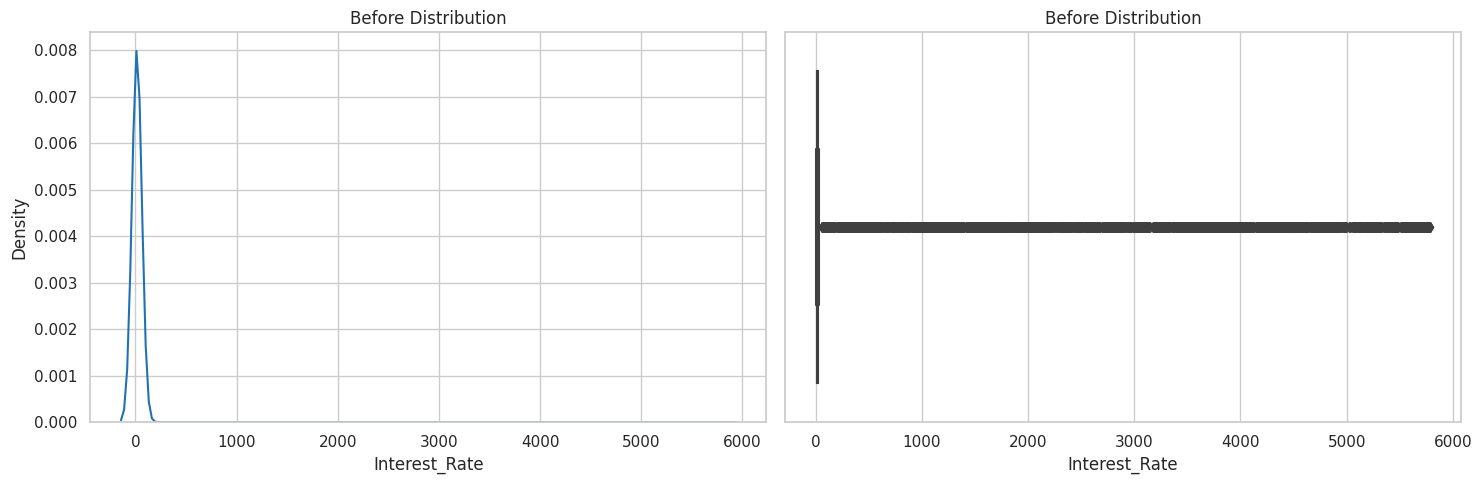

In [ ]:
Distribution2(columne='Interest_Rate',data=data,i=0)

In [ ]:
data[data['Interest_Rate'] > 35].sort_values('Interest_Rate')

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
35442,58796,24464,March,NaN,15,Engineer,12680.815,1334.734583,4,5,59,0,26,11.0,8.79,6.0,Standard,704.18,33.487750,212.0,Yes,0.000000,34.169408,High_spent_Large_value_payments,339.304050,Standard,0,0,0,0,0,1,0,0,0
57905,92491,24226,February,Julien Toyerf,36,Entrepreneur,17869.290,1643.107500,6,3,60,4,30,13.0,10.20,2.0,Standard,276.09,38.310862,324.0,Yes,42.042420,127.532913,Low_spent_Large_value_payments,264.735417,Standard,1,0,0,0,0,1,1,0,0
61480,97854,28633,January,Julien Toyerq,35,Journalist,84050.500,7140.208333,3,5,64,3,2,0.0,7.16,1.0,Good,889.05,31.731434,287.0,No,175.377781,124.043048,High_spent_Large_value_payments,654.600004,Good,0,0,0,1,0,0,0,0,1
18907,33993,23687,April,Lisaz,39,Developer,76395.280,6074.273333,9,8,67,5,21,20.0,22.94,10.0,Bad,3026.97,39.686331,110.0,Yes,208.769613,70.252845,High_spent_Large_value_payments,570.419750,Standard,0,1,0,1,1,1,0,0,0
2648,9606,30096,January,Malathi Nayakw,43,Architect,68665.760,5619.146667,7,6,73,7,6,20.0,7.05,8.0,Standard,420.02,38.630616,145.0,Yes,329.666062,315.972607,Low_spent_Medium_value_payments,196.275998,Standard,0,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86815,135853,10886,August,Lesleyk,36,Accountant,50817.900,4531.825000,3,6,5774,2,16,15.0,17.05,12.0,Standard,2368.19,39.867715,105.0,NM,47.537232,79.419019,High_spent_Medium_value_payments,576.226249,Poor,0,0,0,1,0,0,0,0,1
77710,122196,9668,July,Zieminskia,40,Accountant,14717.280,1069.440000,5,2,5775,3,9,9.0,5.89,3.0,Good,148.52,28.221988,257.0,No,58962.000000,17.478496,High_spent_Large_value_payments,298.381784,Standard,0,0,0,1,0,0,0,0,1
88505,138391,6568,February,NaN,42,Musician,30683.420,2397.951667,4,6,5776,2,27,6.0,10.62,4.0,Standard,7.24,29.706823,310.0,No,46.884456,64.523403,High_spent_Medium_value_payments,378.387307,Standard,0,0,1,0,0,1,0,0,0
23512,40902,12203,January,Anna Yukhananovd,26,Manager,75804.940,6120.078333,0,1,5788,3,9,8.0,7.89,2.0,Good,330.82,35.641926,381.0,No,141.289448,51.867242,High_spent_Large_value_payments,658.851143,Good,0,1,0,1,1,0,0,0,0


In [ ]:
def get_Interest_Rate(row):
    if 35 < row['Interest_Rate'] :
        Interest_Rate=(data[data['Customer_ID']==row['Customer_ID']]['Interest_Rate'].dropna()).mode()
        try:
            return Interest_Rate[0]
        except:
            return np.NaN
    else:
        return row['Interest_Rate']

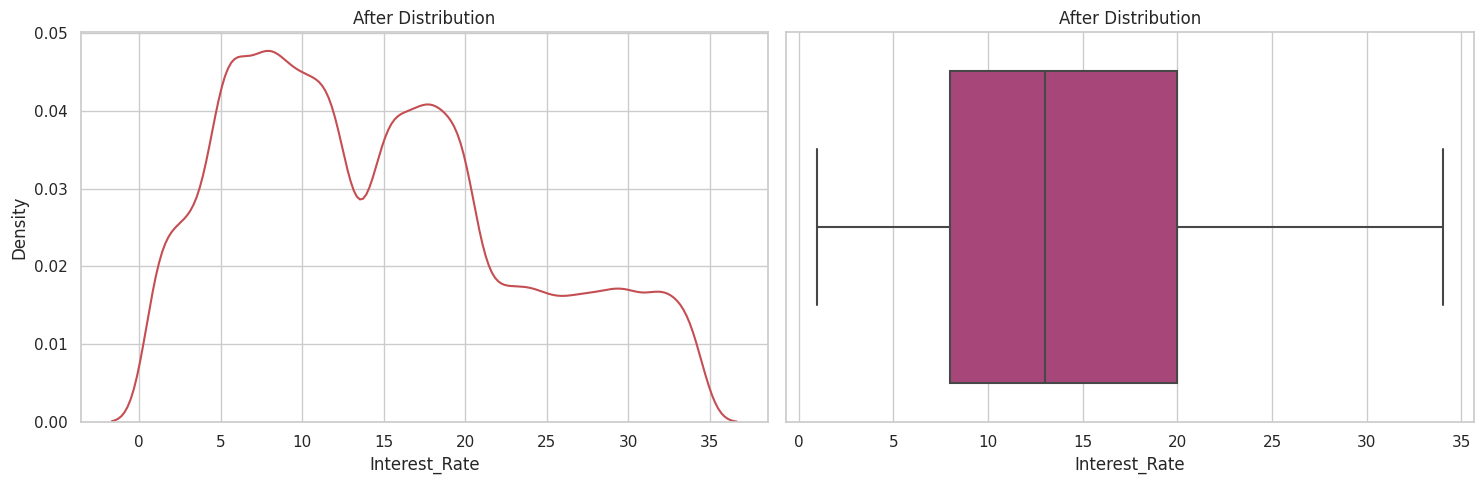

In [ ]:
data['Interest_Rate']=data.apply(get_Interest_Rate,axis=1)
Distribution2(columne='Interest_Rate',data=data,i=1)

Num_Of_Loan

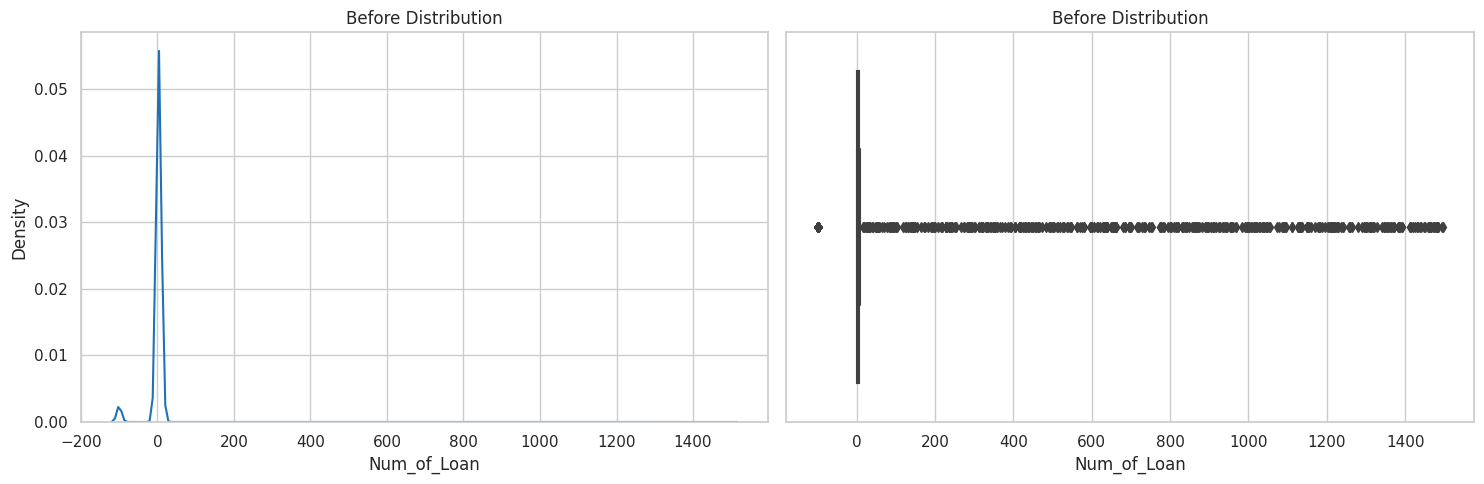

In [ ]:
Distribution2(columne='Num_of_Loan',data=data,i=0)

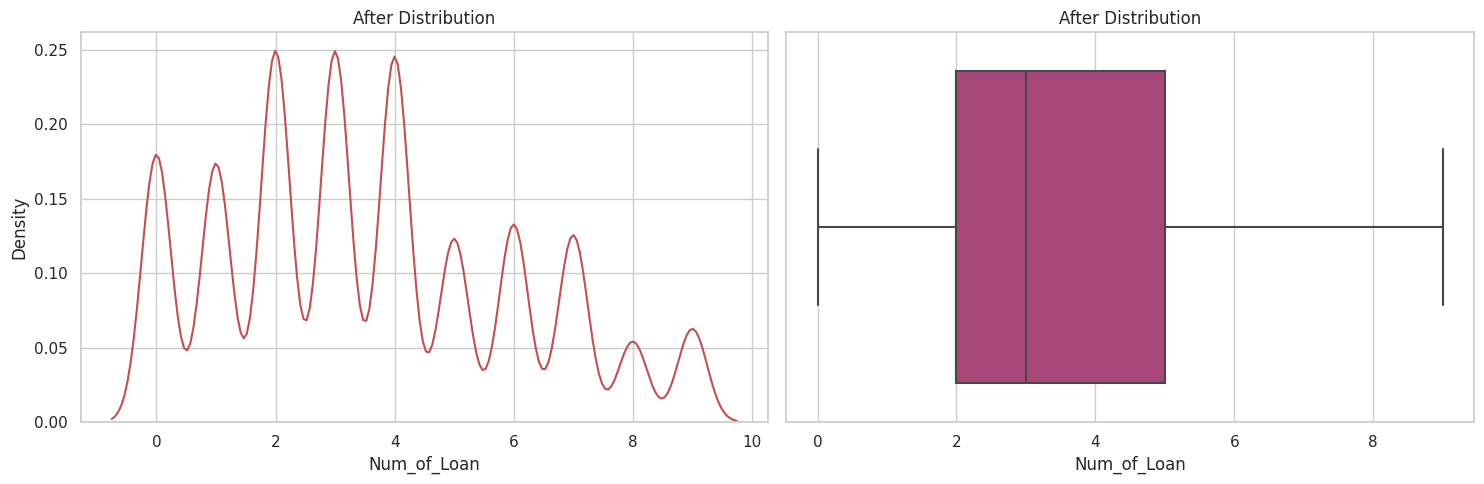

In [ ]:
def get_Num_of_Loan(row):
    if (8 < row['Num_of_Loan']) or (0 > row['Num_of_Loan']):
        Num_of_Loan=(data[data['Customer_ID']==row['Customer_ID']]['Num_of_Loan'].dropna()).mode()
        try:
            return Num_of_Loan[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Loan']
data['Num_of_Loan']=data.apply(get_Num_of_Loan,axis=1)
data.drop(data[data['Num_of_Loan']  < 0].index,axis=0,inplace=True)
Distribution2(columne='Num_of_Loan',data=data,i=1)

Delay_from_due_date

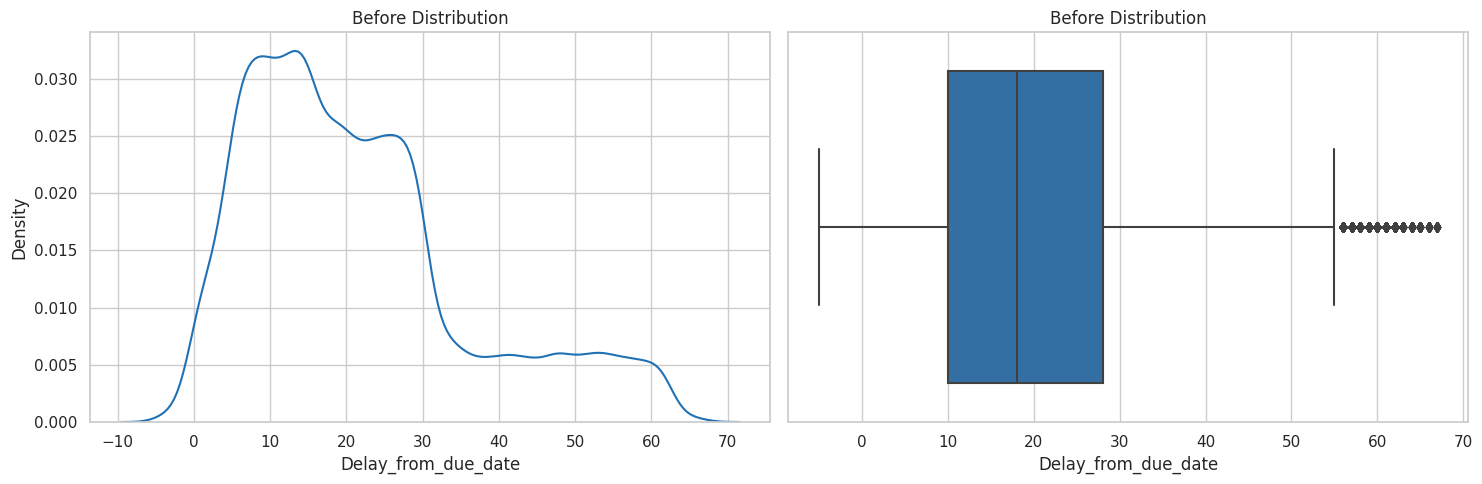

In [ ]:
Distribution2(columne='Delay_from_due_date',data=data,i=0)

Outstanding_Debt

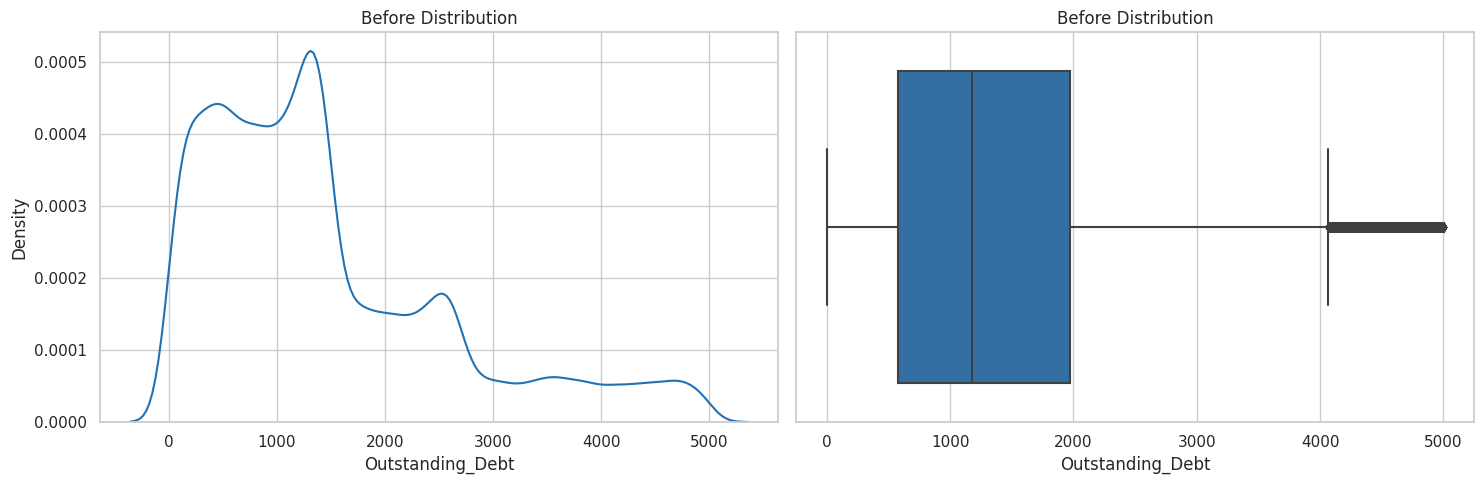

In [ ]:
Distribution2(columne='Outstanding_Debt',data=data,i=0)

Credit_Utilization_Ratio

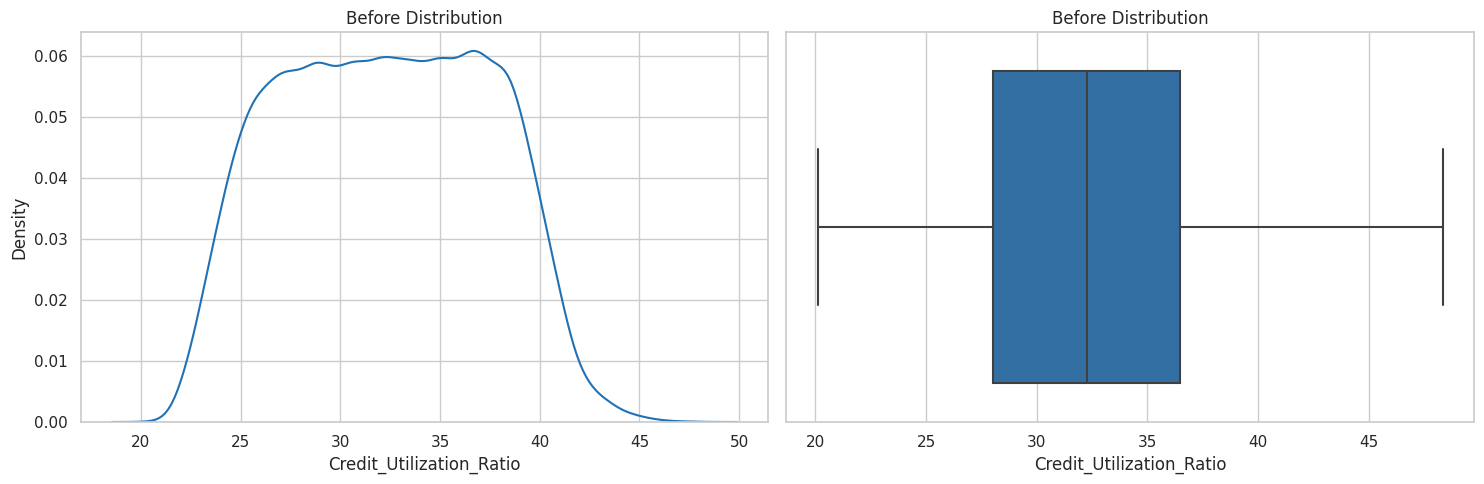

In [ ]:
Distribution2(columne='Credit_Utilization_Ratio',data=data,i=0)

Total_EMI_per_month

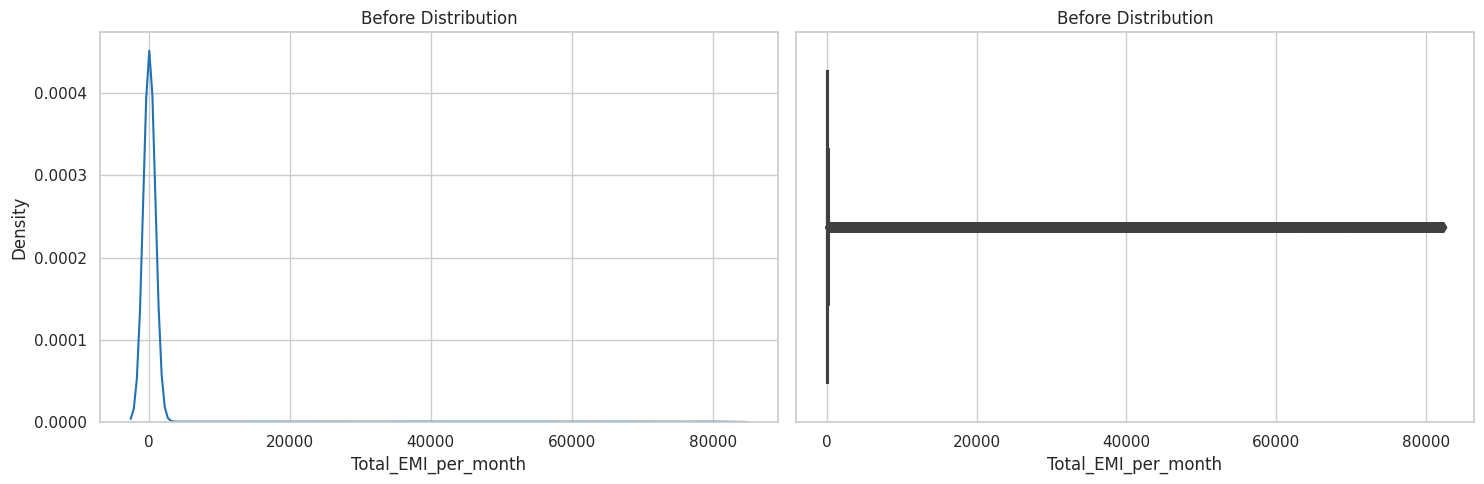

In [ ]:
Distribution2(columne='Total_EMI_per_month',data=data,i=0)

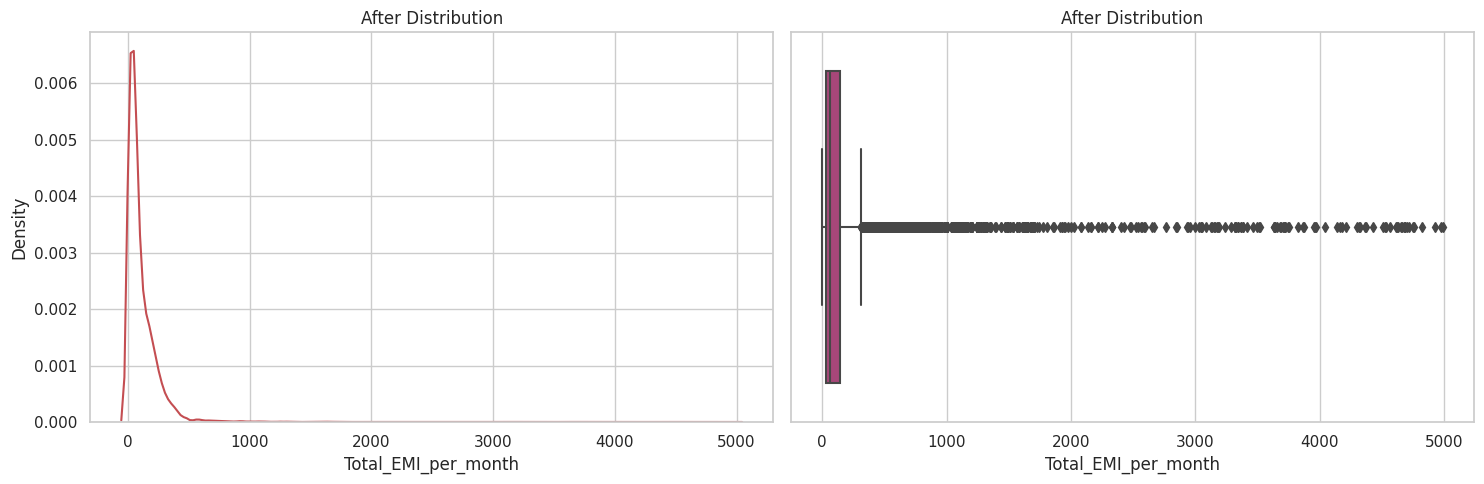

In [ ]:
data=data[data['Total_EMI_per_month']<5000]
Distribution2(columne='Total_EMI_per_month',data=data,i=1)

In [ ]:
data.shape

(87865, 35)

Importing Bank Data

In [ ]:
data.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0
3,5637,3392,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,1,0,1,0,0,0,1,0
4,5638,3392,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,1,0,1,0,0,0,1,0


In [ ]:
data.to_csv("/content/drive/MyDrive/bank_data.csv", index=False)
process_df= pd.read_csv("/content/drive/MyDrive/bank_data.csv",sep = "," , encoding = "utf-8")
process_df.head()

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,1,1,0,1,0,0,0,1,0
1,5635,3392,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,1,1,0,1,0,0,0,1,0
2,5636,3392,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,1,1,0,1,0,0,0,1,0
3,5637,3392,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,1,1,0,1,0,0,0,1,0
4,5638,3392,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3,4,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,1,1,0,1,0,0,0,1,0


In [ ]:
def drop_columns(DataFrame):
    lazy_list=['ID','Customer_ID','Name']
    DataFrame.drop(lazy_list, axis=1, inplace=True)
drop_columns(process_df)

Encoding categorical features

In [ ]:
process_df['Month'] = process_df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
Occupation_le = LabelEncoder()

process_df['Occupation'] = Occupation_le.fit_transform(process_df['Occupation'])
Occupation_le.classes_

array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
      dtype=object)

In [ ]:
Credit_Mix_le = LabelEncoder()

process_df['Credit_Mix'] = Credit_Mix_le.fit_transform(process_df['Credit_Mix'])
Credit_Mix_le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [ ]:
Payment_Behaviour_le = LabelEncoder()

process_df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(process_df['Payment_Behaviour'])
Payment_Behaviour_le.classes_

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [ ]:
Payment_of_Min_Amount_le = LabelEncoder()

process_df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(process_df['Payment_of_Min_Amount'])
Payment_of_Min_Amount_le.classes_

array(['NM', 'No', 'Yes'], dtype=object)

Scaling and Splitting the data

In [ ]:
x = process_df.drop('Credit_Score',axis=1)
y = process_df['Credit_Score']

In [ ]:
process_df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [ ]:
y_le = LabelEncoder()

y_Encode = y_le.fit_transform(y)
y_le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [ ]:
x_updated1 = pd.DataFrame(x, columns=['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'])

In [ ]:
x_updated1.dtypes

Month                       float64
Age                         float64
Occupation                  float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Auto Loan                   float64
Credit-Builder Loan         float64
Debt Consolidation Loan     float64
Home Equity Loan            float64
Mortgage Loan               float64
Not Specified               

In [ ]:
scaler = MinMaxScaler()
x_scalar = scaler.fit_transform(x_updated1[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card','Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age','Payment_of_Min_Amount','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']])

In [ ]:
x_scalar

array([[0.0767043 , 0.11540128, 0.27272727, ..., 0.00993287, 0.08042647,
        0.21404304],
       [0.0767043 , 0.11540128, 0.27272727, ..., 0.00993287, 0.11829666,
        0.19495646],
       [0.0767043 , 0.11540128, 0.27272727, ..., 0.00993287, 0.08171087,
        0.22686274],
       ...,
       [0.20666416, 0.23181719, 0.36363636, ..., 0.00703346, 0.02403182,
        0.3539922 ],
       [0.20666416, 0.23181719, 0.36363636, ..., 0.00703346, 0.25170755,
        0.21861238],
       [0.20666416, 0.23181719, 0.36363636, ..., 0.00703346, 0.16718709,
        0.26964844]])

In [ ]:
x_scalar_df = pd.DataFrame(x_scalar, columns=['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card','Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age','Payment_of_Min_Amount','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance'])

In [ ]:
x_updated1 = x_updated1.drop(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'], axis=1)


In [ ]:
final = pd.concat([x_updated1, x_scalar_df], axis=1)

In [ ]:
final.shape

(87865, 31)

In [ ]:
# x_updated = pd.DataFrame(x, columns=['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
#        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
#        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
#        'Credit_Utilization_Ratio', 'Credit_History_Age',
#        'Payment_of_Min_Amount', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Auto Loan', 'Credit-Builder Loan',
#        'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
#        'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'])

In [ ]:
final

,Month,Age,Occupation,Payment_Behaviour,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,0.000000,0.214286,0.857143,0.4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.111111,0.048276,0.486842,0.081633,0.5,0.162020,0.236103,0.655087,0.5,0.009933,0.080426,0.214043
1,0.142857,0.214286,0.857143,0.6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.055556,0.027586,0.486842,0.081633,0.5,0.162020,0.417976,0.655087,0.5,0.009933,0.118297,0.194956
2,0.285714,0.214286,0.857143,0.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.111111,0.048276,0.486842,0.081633,0.5,0.162020,0.299542,0.660050,0.5,0.009933,0.081711,0.226863
3,0.428571,0.214286,0.857143,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.138889,0.027586,0.349781,0.081633,0.5,0.162020,0.397841,0.662531,0.5,0.009933,0.199486,0.153052
4,0.571429,0.214286,0.857143,0.2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.152778,0.027586,0.486842,0.081633,0.5,0.162020,0.164194,0.665012,0.5,0.009933,0.041426,0.233904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87860,0.428571,0.261905,0.642857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.388889,0.048276,0.493147,0.061224,0.5,0.100473,0.514503,0.935484,0.5,0.007033,0.060980,0.328688
87861,0.571429,0.261905,0.642857,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.319444,0.048276,0.493147,0.061224,0.5,0.100473,0.724060,0.937965,0.5,0.007033,0.054193,0.340185
87862,0.714286,0.261905,0.642857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.444444,0.041379,0.493147,0.061224,0.5,0.100473,0.748556,0.940447,0.5,0.007033,0.024032,0.353992
87863,0.857143,0.261905,0.642857,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.347222,0.041379,0.493147,0.061224,0.5,0.100473,0.478096,0.942928,0.5,0.007033,0.251708,0.218612


In [ ]:
x_updated

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0.000000,0.214286,0.857143,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.111111,0.048276,0.486842,0.081633,0.5,0.162020,0.236103,0.655087,0.5,0.009933,0.080426,0.4,0.214043,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.142857,0.214286,0.857143,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.055556,0.027586,0.486842,0.081633,0.5,0.162020,0.417976,0.655087,0.5,0.009933,0.118297,0.6,0.194956,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.285714,0.214286,0.857143,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.111111,0.048276,0.486842,0.081633,0.5,0.162020,0.299542,0.660050,0.5,0.009933,0.081711,0.8,0.226863,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.428571,0.214286,0.857143,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.138889,0.027586,0.349781,0.081633,0.5,0.162020,0.397841,0.662531,0.5,0.009933,0.199486,1.0,0.153052,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.571429,0.214286,0.857143,0.076704,0.115401,0.272727,0.363636,0.060606,0.444444,0.152778,0.027586,0.486842,0.081633,0.5,0.162020,0.164194,0.665012,0.5,0.009933,0.041426,0.2,0.233904,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87860,0.428571,0.261905,0.642857,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.388889,0.048276,0.493147,0.061224,0.5,0.100473,0.514503,0.935484,0.5,0.007033,0.060980,0.0,0.328688,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87861,0.571429,0.261905,0.642857,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.319444,0.048276,0.493147,0.061224,0.5,0.100473,0.724060,0.937965,0.5,0.007033,0.054193,0.2,0.340185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87862,0.714286,0.261905,0.642857,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.444444,0.041379,0.493147,0.061224,0.5,0.100473,0.748556,0.940447,0.5,0.007033,0.024032,0.0,0.353992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87863,0.857143,0.261905,0.642857,0.206664,0.231817,0.363636,0.545455,0.181818,0.222222,0.347222,0.041379,0.493147,0.061224,0.5,0.100473,0.478096,0.942928,0.5,0.007033,0.251708,0.6,0.218612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


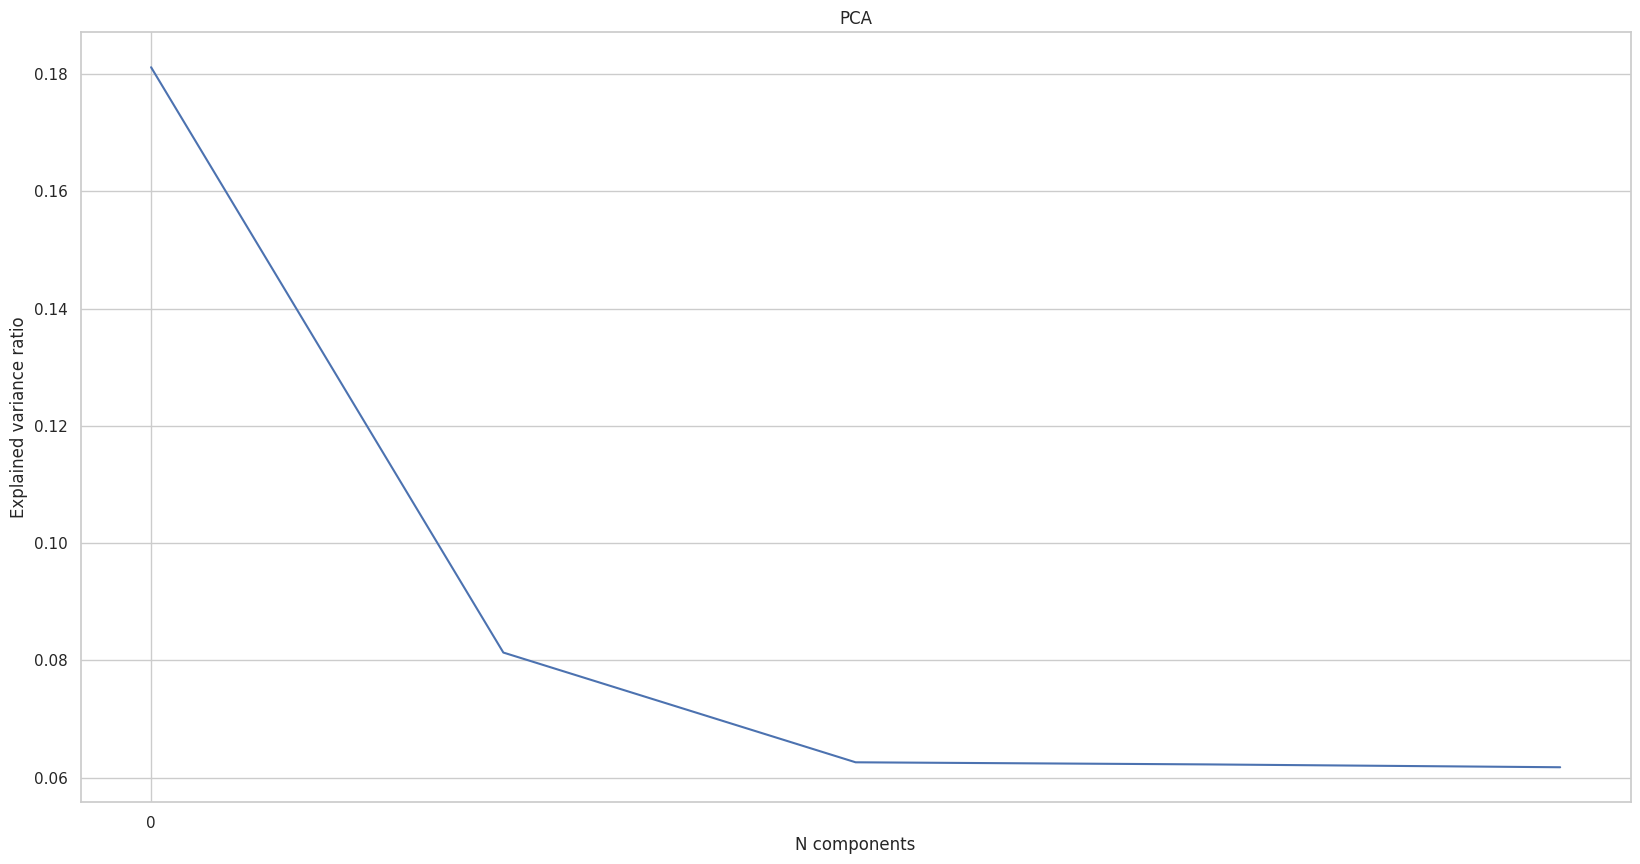

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# perform PCA and keep the first 10 components
pca = PCA(n_components=5)
X_new = pca.fit_transform(final)

# plot the explained variance ratio for each component
plt.figure(figsize=(20,10))
plt.title('PCA')
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('N components')
plt.ylabel('Explained variance ratio')
plt.xticks(range(0, len(pca.explained_variance_ratio_),5))
plt.show()

In [ ]:
feature_names = list(final.columns)

In [ ]:
feature_names

['Month',
 'Age',
 'Occupation',
 'Payment_Behaviour',
 'Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [ ]:
# print the top 3 original features contributing to each transformed feature
for i, component in enumerate(pca.components_):
    top_features = sorted(zip(component, feature_names), reverse=True)[:5]
    print("Transformed feature", i+1, ":")
    for val, feature in top_features:
        print("\t", feature, ":", val)

Transformed feature 1 :
	 Num_of_Loan : 0.32321304779438154
	 Credit-Builder Loan : 0.2555187154937686
	 Home Equity Loan : 0.24882619029453082
	 Payday Loan : 0.24838094203575975
	 Personal Loan : 0.24614660622259008
Transformed feature 2 :
	 Not Specified : 0.9236264662051473
	 Outstanding_Debt : 0.10246512661424248
	 Interest_Rate : 0.09624520127198095
	 Delay_from_due_date : 0.0750628412860631
	 Num_Bank_Accounts : 0.07371042188443148
Transformed feature 3 :
	 Mortgage Loan : 0.4137015424447047
	 Student Loan : 0.3894876683446155
	 Personal Loan : 0.25746255202574614
	 Credit-Builder Loan : 0.13004088118198287
	 Home Equity Loan : 0.1074152908846881
Transformed feature 4 :
	 Student Loan : 0.6503662419776494
	 Payday Loan : 0.41244822061094566
	 Auto Loan : 0.13368732377180115
	 Annual_Income : 0.013962686662445243
	 Monthly_Inhand_Salary : 0.013665705487574118
Transformed feature 5 :
	 Mortgage Loan : 0.5106889832413785
	 Debt Consolidation Loan : 0.41139977912939424
	 Personal Lo

In [ ]:
import pandas as pd

# convert Numpy array to DataFrame
x_new_df = pd.DataFrame(X_new, columns=["Transformed Feature " + str(i+1) for i in range(X_new.shape[1])])

Model

In [ ]:
x_new_df

,Transformed Feature 1,Transformed Feature 2,Transformed Feature 3,Transformed Feature 4,Transformed Feature 5
0,0.231381,-0.689009,0.258132,-0.720684,-0.676005
1,0.233704,-0.685507,0.251707,-0.724467,-0.672892
2,0.261521,-0.672398,0.244147,-0.728768,-0.669111
3,0.267419,-0.667167,0.236869,-0.732560,-0.664267
4,0.220374,-0.694790,0.264124,-0.718595,-0.680108
...,...,...,...,...,...
87860,-0.406136,-0.472156,0.175662,0.790034,-0.269193
87861,-0.407698,-0.469681,0.169483,0.786183,-0.266778
87862,-0.405281,-0.469050,0.175879,0.790581,-0.269894
87863,-0.360698,-0.450328,0.154108,0.777256,-0.256823


In [ ]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [ ]:
def feature_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(15,8))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

In [ ]:
features = process_df.drop(['Credit_Score'] , axis = 1)

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x_new_df,y_Encode, test_size=0.3,random_state = 1234)
lr = LogisticRegression(C = 100)
lr.fit(x_train , y_train)

LogisticRegression(C=100)

In [ ]:
lr_score_train=lr.score(x_train , y_train)
lr_score_train

0.571920982033981

In [ ]:
lr_score_test=lr.score(x_test , y_test)
lr_score_test

0.5706752655538695

Training Accuracy Logistic Regression 57.1920982033981  Test Accuracy Logistic Regression 57.06752655538695


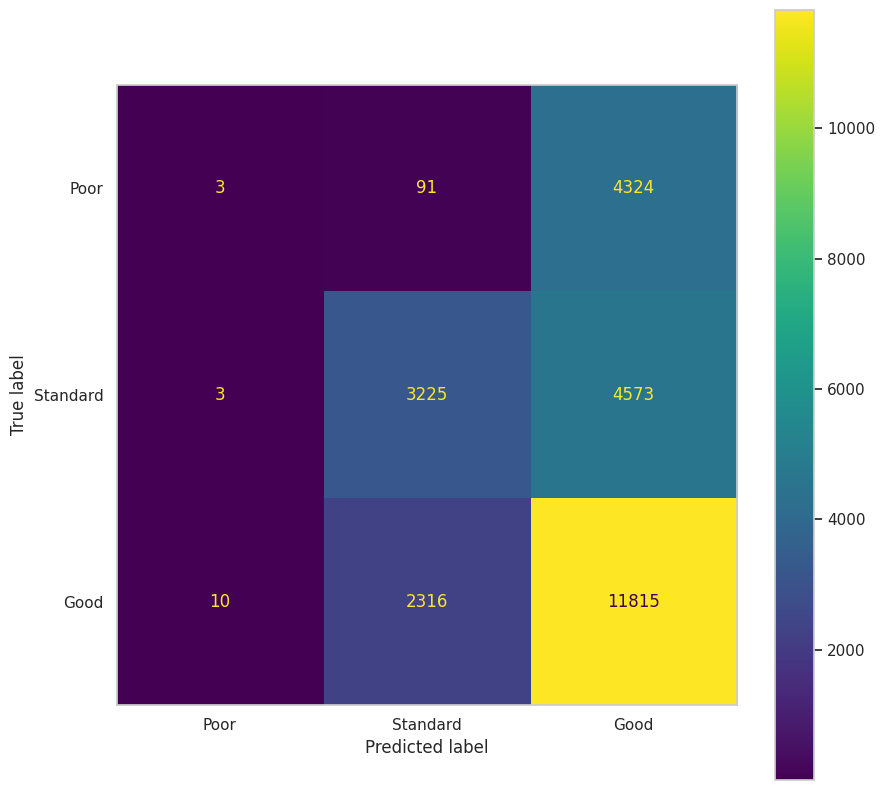

In [ ]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

In [ ]:
Y_pred=lr.predict(x_test)

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,2,2,1,2,1,2,2,2,2,2,2,2,0,1,1,2,2,2,2,2


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test = train_test_split(x_new_df,y_Encode, test_size=0.3,random_state = 1234)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_score_train=knn.score(x_train , y_train)
knn_score_train

0.7628160312169743

In [ ]:
knn_score_test=knn.score(x_test , y_test)
knn_score_test

0.6787556904400607

Training Accuracy KNeighborsClassifier 76.28160312169743  Test Accuracy KNeighborsClassifier 67.87556904400607


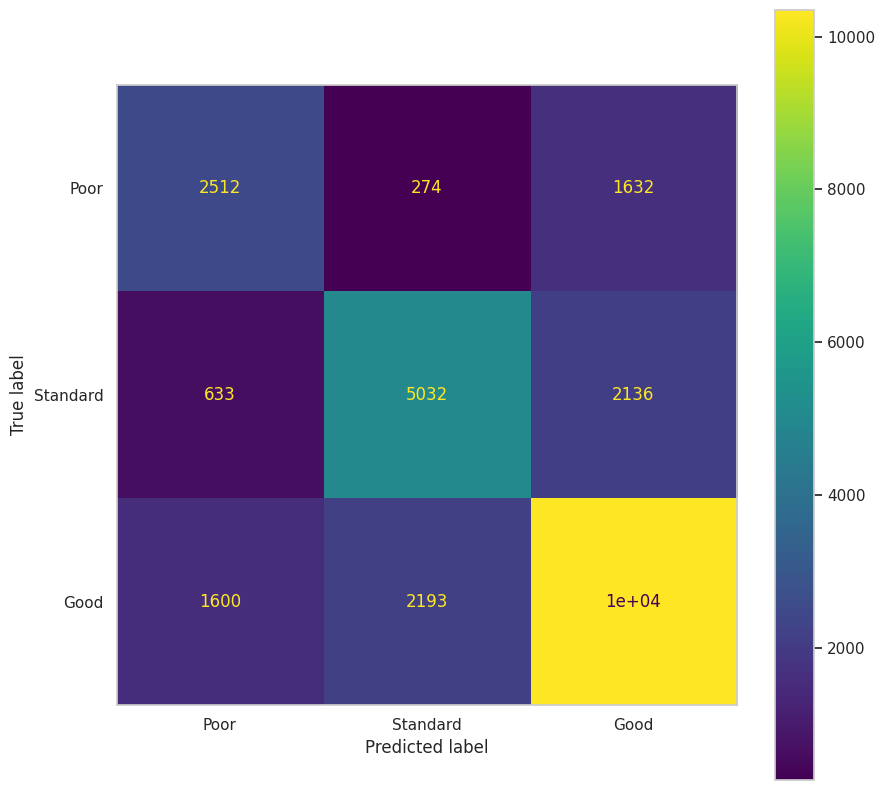

In [ ]:
evaluate_classification(knn, "KNeighborsClassifier", x_train,x_test,y_train,y_test)

In [ ]:
Y_pred=knn.predict(x_test)

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,0,0,2,2,1,2,2,2,2,2,2,1,0,1,1,2,0,2,1,0


Decision Tree

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x_new_df,y_Encode, test_size=0.3,random_state = 1234)
dt =DecisionTreeClassifier(max_features=14 ,    max_depth=12)
dt.fit(x_train , y_train)
DecisionTreeClassifier(max_depth=12, max_features=14)
dt_score_train=dt.score(x_train , y_train)
dt_score_train

0.6938297699374034

In [ ]:
dt_score_test=dt.score(x_test , y_test)
dt_score_test

0.6316767830045523

Training Accuracy DecisionTreeClassifier 69.38297699374034  Test Accuracy DecisionTreeClassifier 63.16767830045523


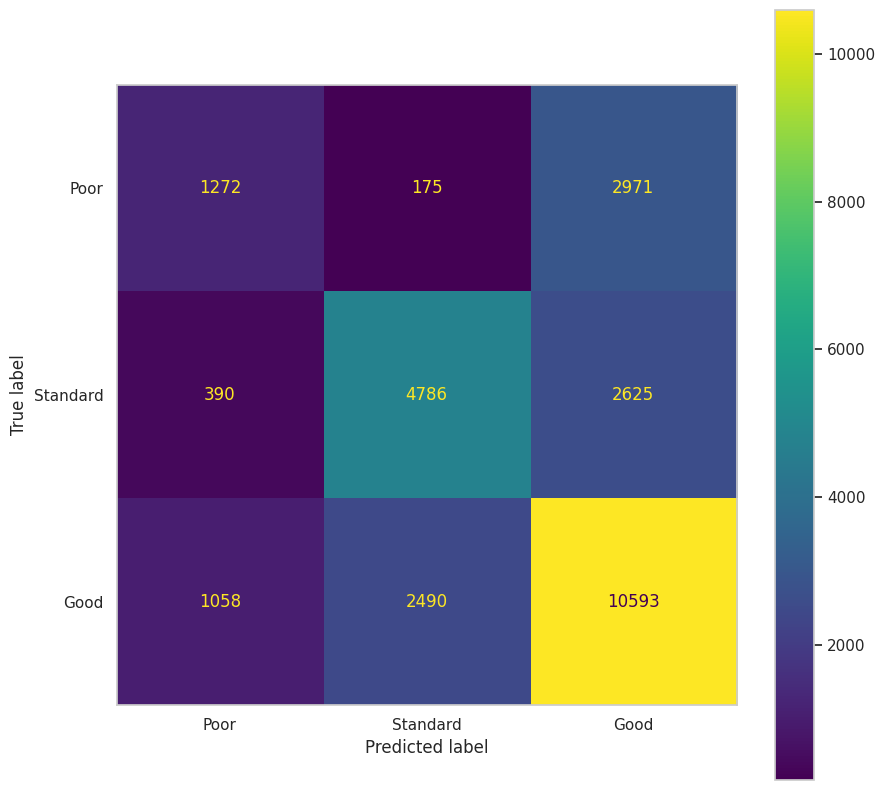

In [ ]:
evaluate_classification(dt, "DecisionTreeClassifier", x_train,x_test,y_train,y_test)

In [ ]:
Y_pred=dt.predict(x_test)

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,2,0,2,2,1,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0


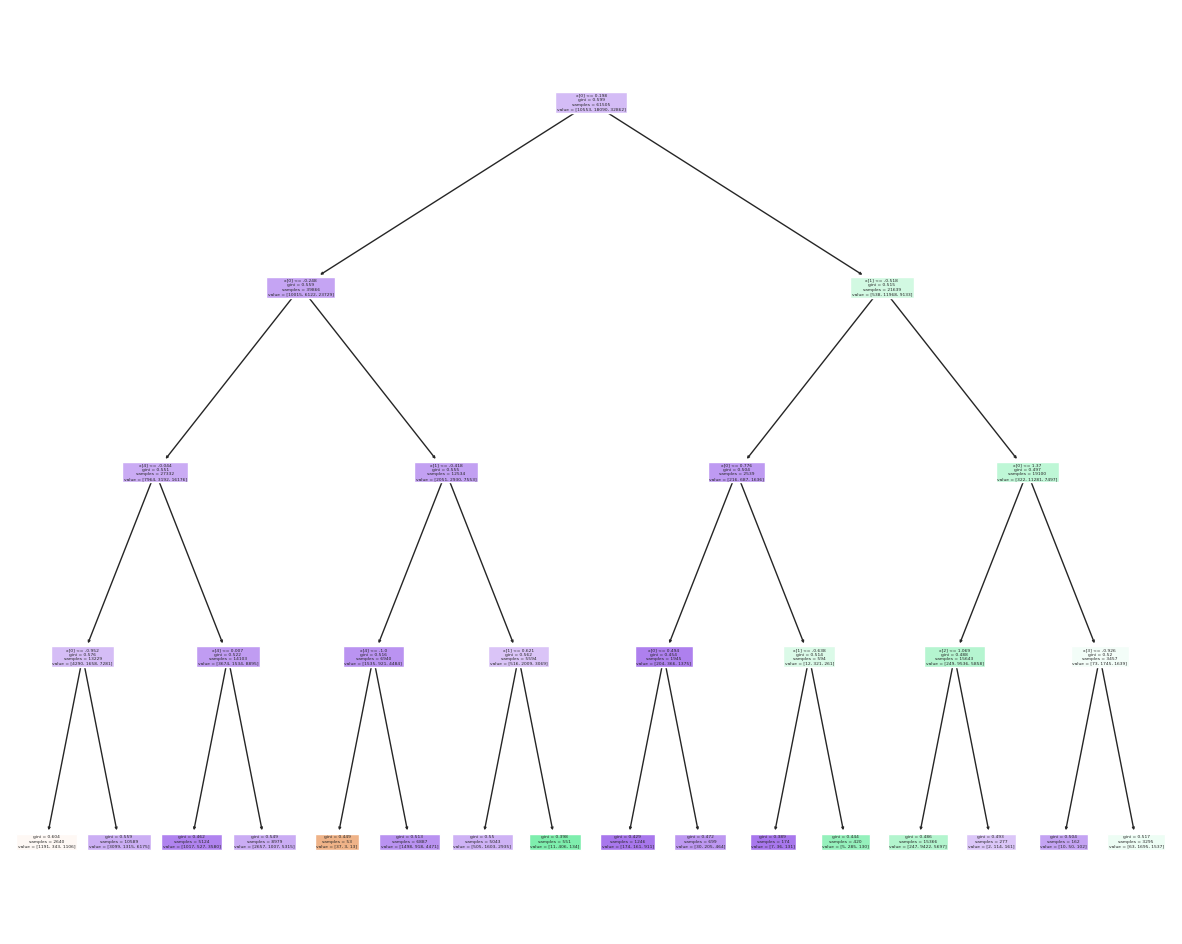

In [ ]:
from sklearn import tree

#to a simple plot,We used max depth of 4
dtt = DecisionTreeClassifier(max_depth=4)

dtt.fit(x_train, y_train)
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dtt , filled=True)
plt.show()

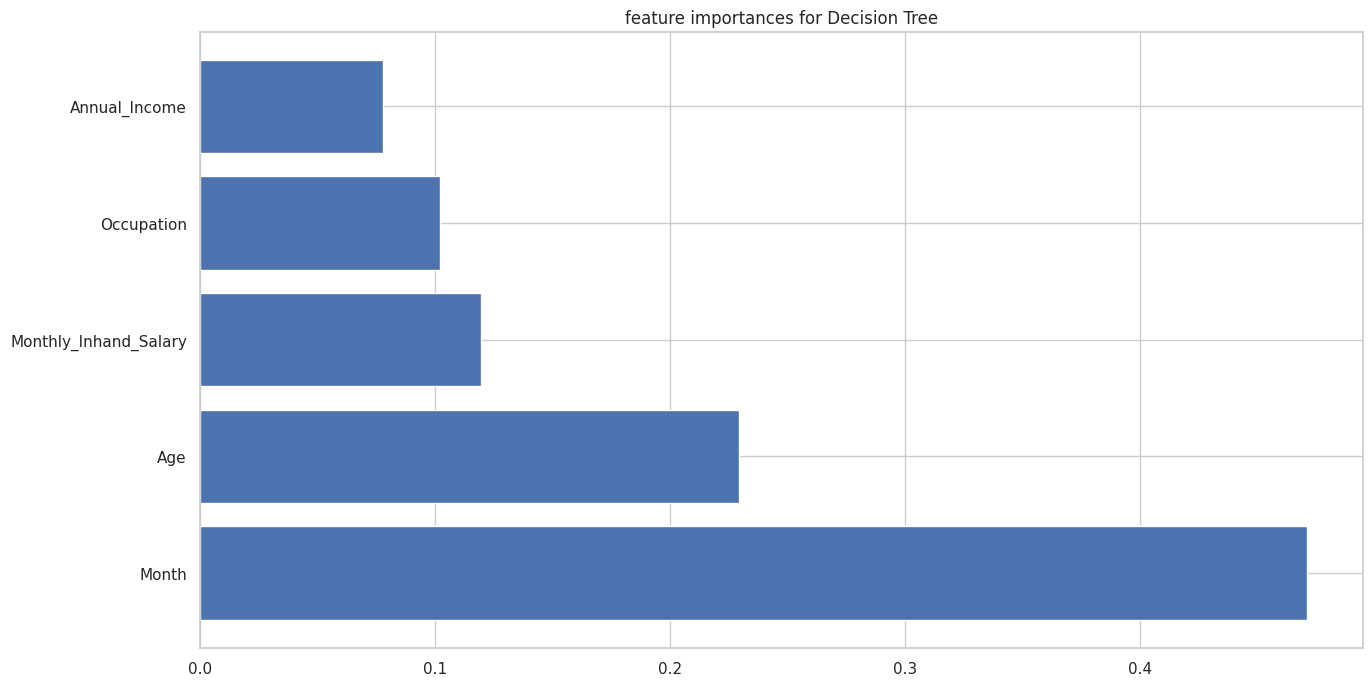

In [ ]:
feature_importances(abs(dt.feature_importances_), features, top=5)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x_new_df,y_Encode, test_size=0.3,random_state = 1234)
rf = RandomForestClassifier(max_features=15 , max_depth=12)
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=12, max_features=15)

In [ ]:
rf_score_train=rf.score(x_train , y_train)
rf_score_train

0.7293065604422405

In [ ]:
rf_score_test=rf.score(x_test , y_test)
rf_score_test

0.6605083459787557

Training Accuracy RandomForestClassifier 72.93065604422405  Test Accuracy RandomForestClassifier 66.05083459787558


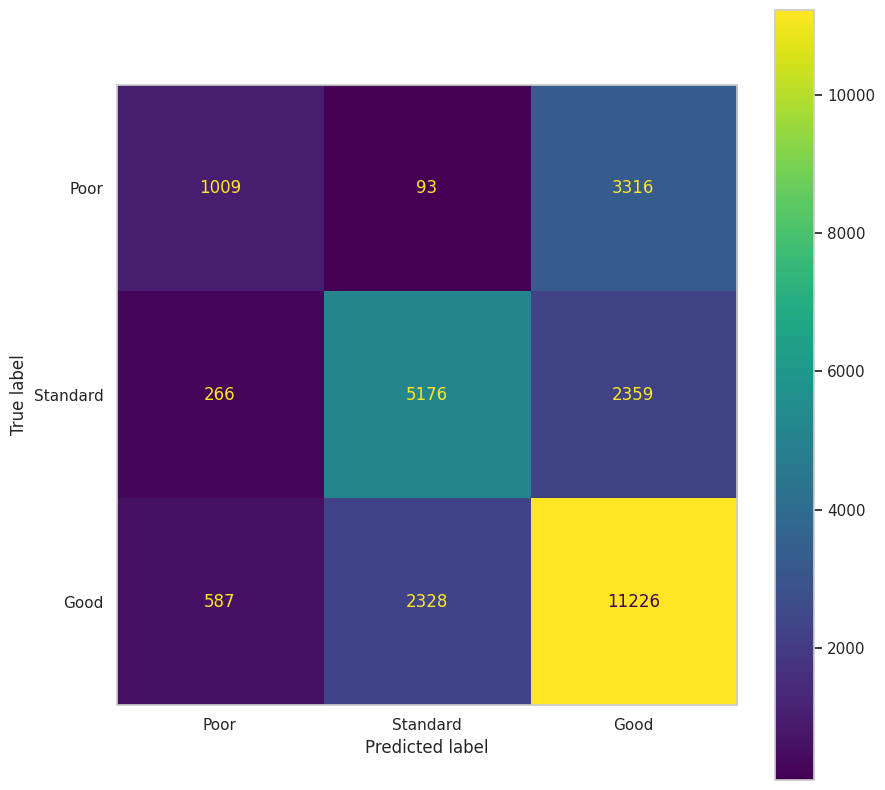

In [ ]:
evaluate_classification(rf, "RandomForestClassifier", x_train,x_test,y_train,y_test)

In [ ]:
Y_pred=rf.predict(x_test)

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,2,0,1,2,1,2,2,2,2,2,2,1,2,1,1,2,2,2,2,0


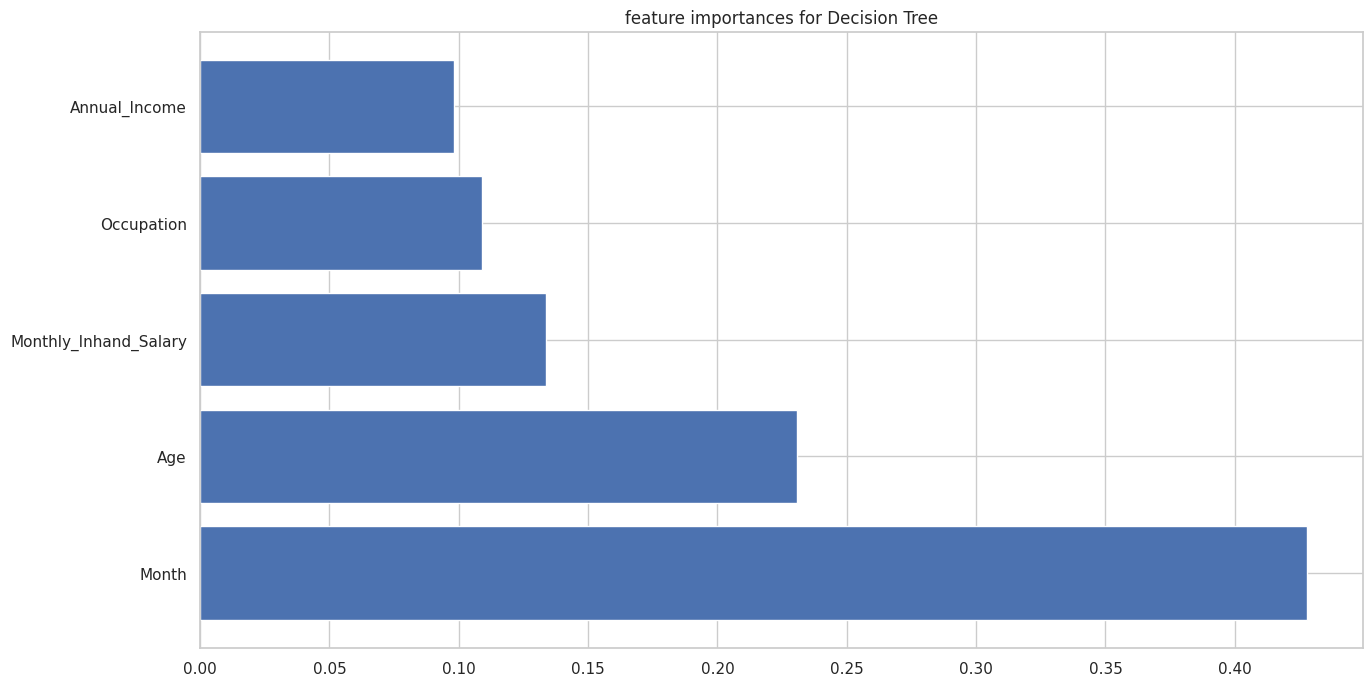

In [ ]:
feature_importances(abs(rf.feature_importances_), features, top=5)

XGBoost

In [ ]:
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test = train_test_split(x_new_df,y_Encode, test_size=0.3,random_state = 1234)
xgb = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
xgb.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgb_score_train=xgb.score(x_train , y_train)
xgb_score_train

0.6253150150394277

In [ ]:
xgb_score_test=xgb.score(x_test , y_test)
xgb_score_test

0.6193474962063733

Training Accuracy XGBOOST 62.53150150394276  Test Accuracy XGBOOST 61.934749620637334


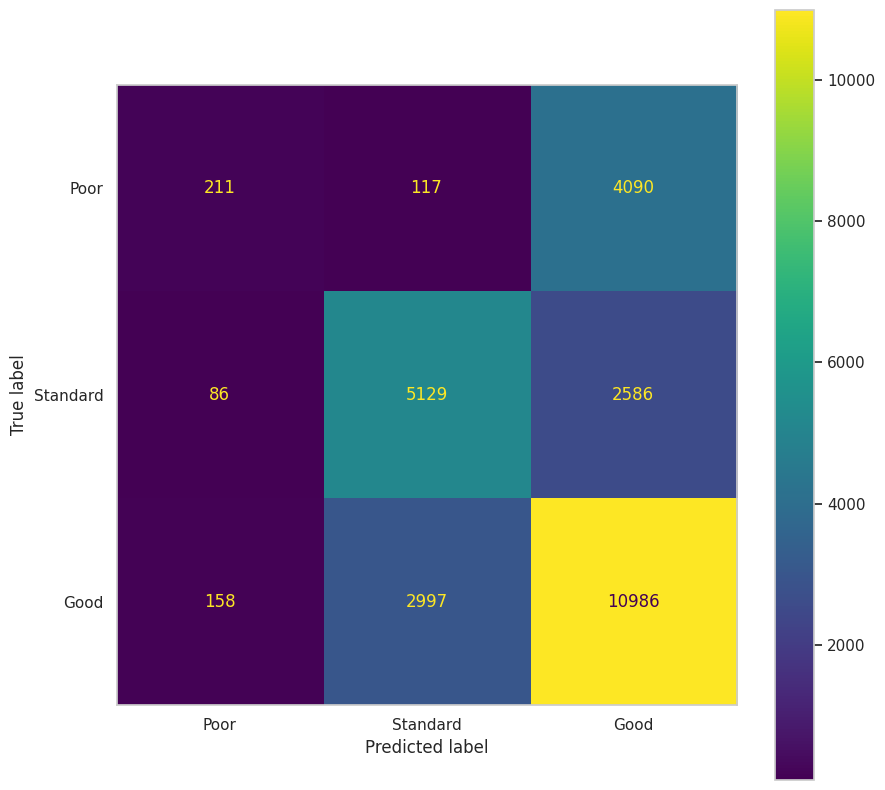

In [ ]:
evaluate_classification(xgb, "XGBOOST", x_train,x_test,y_train,y_test)

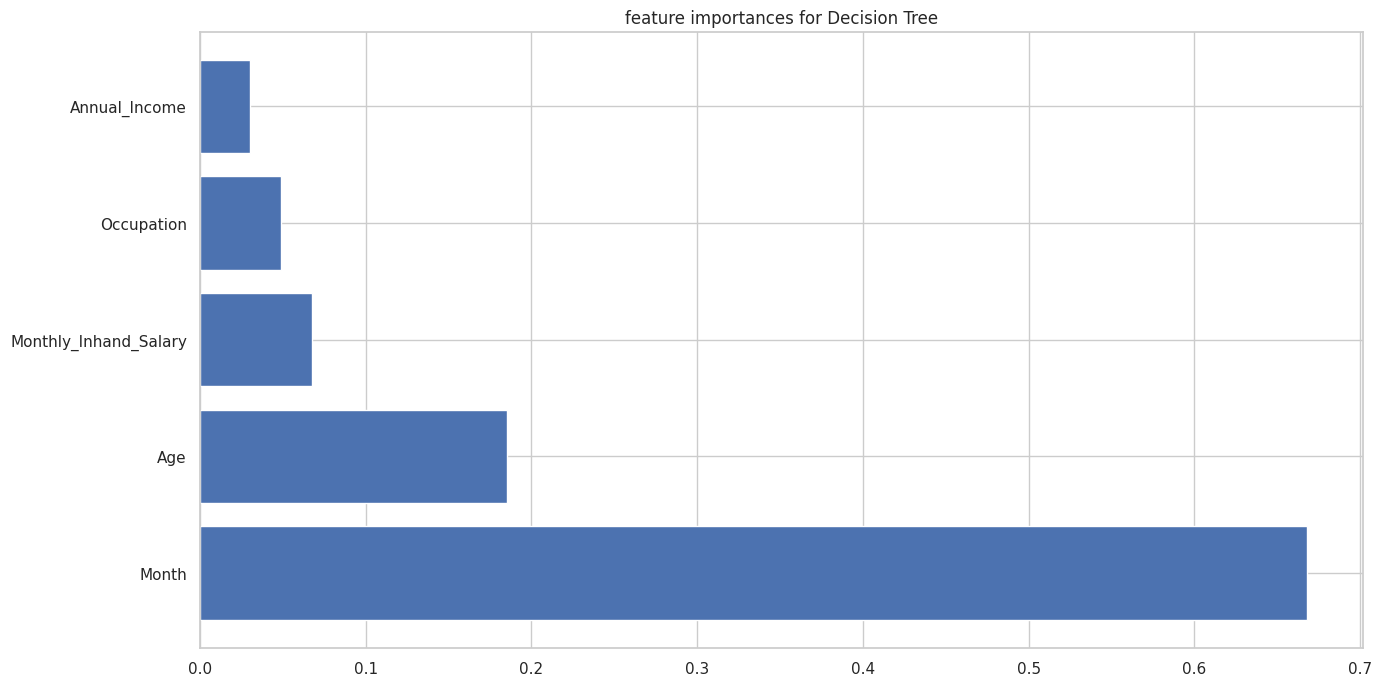

In [ ]:
feature_importances(abs(xgb.feature_importances_), features, top=5)

In [ ]:
Y_pred=xgb.predict(x_test)

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Y_test,2,2,1,0,1,2,2,1,2,2,2,1,0,2,1,2,2,2,0,1
Y_pred,2,2,1,2,1,2,2,2,2,2,2,1,2,1,1,2,2,2,2,2


Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_new_df,y, test_size=0.3,random_state = 1312)

In [ ]:
clf1 = LogisticRegression(C = 100)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = DecisionTreeClassifier(max_features=14 ,    max_depth=12)
clf4 = RandomForestClassifier(max_features=15 , max_depth=12)
clf5 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [ ]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf5) ,("RandomForestClassifier" , clf4),
                                     ("DecisionTreeClassifier",clf3)] , voting = "hard")

In [ ]:
v_clf.fit(x_train , y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression(C=100)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=7)),
                             ('XGBClassifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=12,
                                                     max_features=15)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(max_depth=12,
                                                     max_features=14))])

In [ ]:
v_clf_score_train=v_clf.score(x_train , y_train)
v_clf_score_train

0.699227705064629

In [ ]:
v_clf_score_test=v_clf.score(x_test , y_test)
v_clf_score_test

0.6543247344461305

Training Accuracy Voting 69.9227705064629  Test Accuracy Voting 65.43247344461305


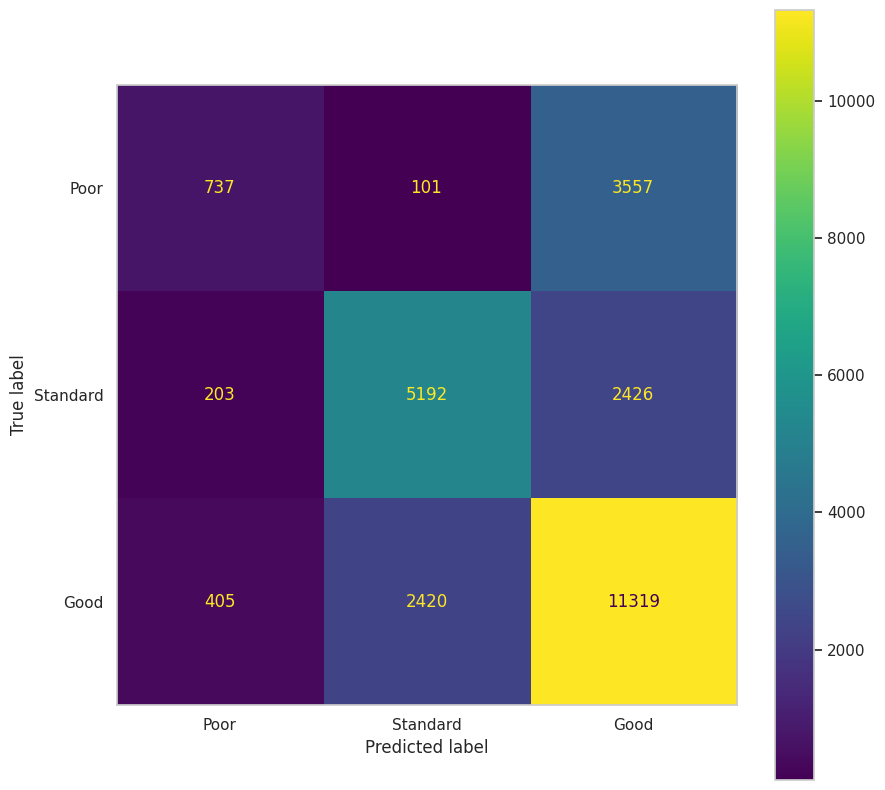

In [ ]:
evaluate_classification(v_clf, "Voting", x_train,x_test,y_train,y_test)

In [ ]:
Y_pred=v_clf.predict(x_test)

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(20).T

,67403,56407,79034,44602,28250,47966,54449,51178,85057,7581,76587,78254,9526,14769,54834,26877,64081,3224,86164,62456
Y_test,Good,Poor,Good,Standard,Standard,Standard,Standard,Standard,Standard,Poor,Standard,Poor,Standard,Standard,Good,Good,Standard,Standard,Poor,Poor
Y_pred,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Standard,Poor,Standard,Poor,Good,Standard,Poor,Standard,Poor,Poor


Comparison between the models

In [ ]:
models = ['Logistic Regression' , 'KNN' , 'Decision Tree','Random forest','XGBOOST','Voting']
data = [[lr_score_train ,lr_score_test ] , [knn_score_train ,knn_score_test ] , [dt_score_train ,dt_score_test ],
       [rf_score_train,rf_score_test],[xgb_score_train,xgb_score_test],[v_clf_score_train,v_clf_score_test]]
cols = ["Train score" , "Test score"]
pd.DataFrame(data=data , index= models , columns= cols).sort_values(ascending= False , by = ["Test score","Train score"])

,Train score,Test score
KNN,0.762816,0.678756
Random forest,0.729307,0.660508
Voting,0.699228,0.654325
Decision Tree,0.693830,0.631677
XGBOOST,0.625315,0.619347
Logistic Regression,0.571921,0.570675


In [ ]:
import pickle

In [ ]:
pickle.dump(knn, open('rf.pkl', 'wb'))

In [ ]:
# Load the saved model
loaded_model = pickle.load(open('rf.pkl', 'rb'))

# Use the loaded model to make predictions
predictions = loaded_model.predict(x_test)

In [ ]:
predictions

array([0, 2, 0, ..., 2, 2, 0])

In [ ]:
y_Encode

array([0, 0, 0, ..., 1, 2, 1])

In [ ]:
x_new_df.to_csv('mydata.csv', index=False)

In [ ]:
x_test.to_csv('test.csv', index=False)

In [ ]:
y_test.to_csv('testy.csv', index=False)